# CS203 Lab 1

## Team Number: 33
## Team Members

### Member 1
- Name: Vivek Raj
- Roll No: 23110362
- Github: VivekRaj2708

### Member 2
- Name: Sharvari Mirge
- Roll No: 23110298
- Github: msharvari31


# Enviornment Setup

## Clear History

```bash
history -c && history -w
history
```



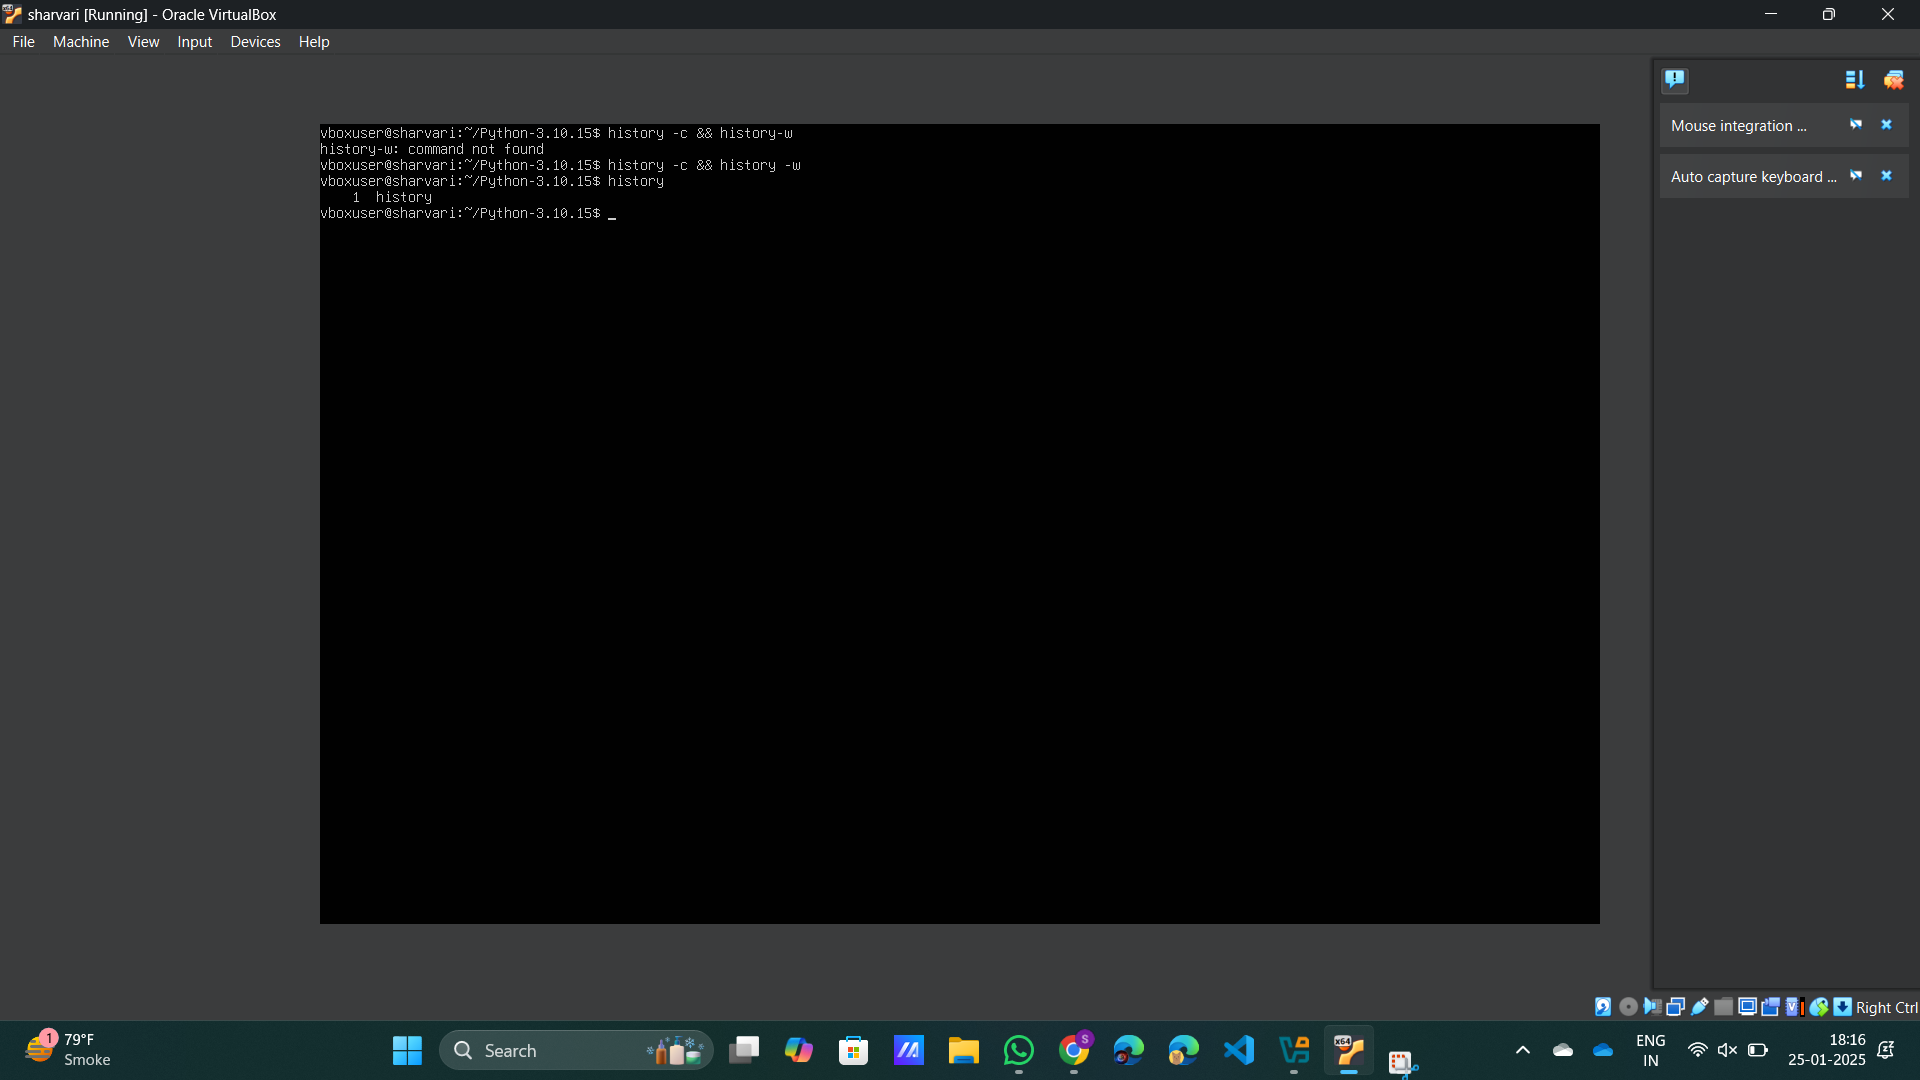

## Listing Python 3.10

```bash
sudo apt list | grep -i python3.10
```



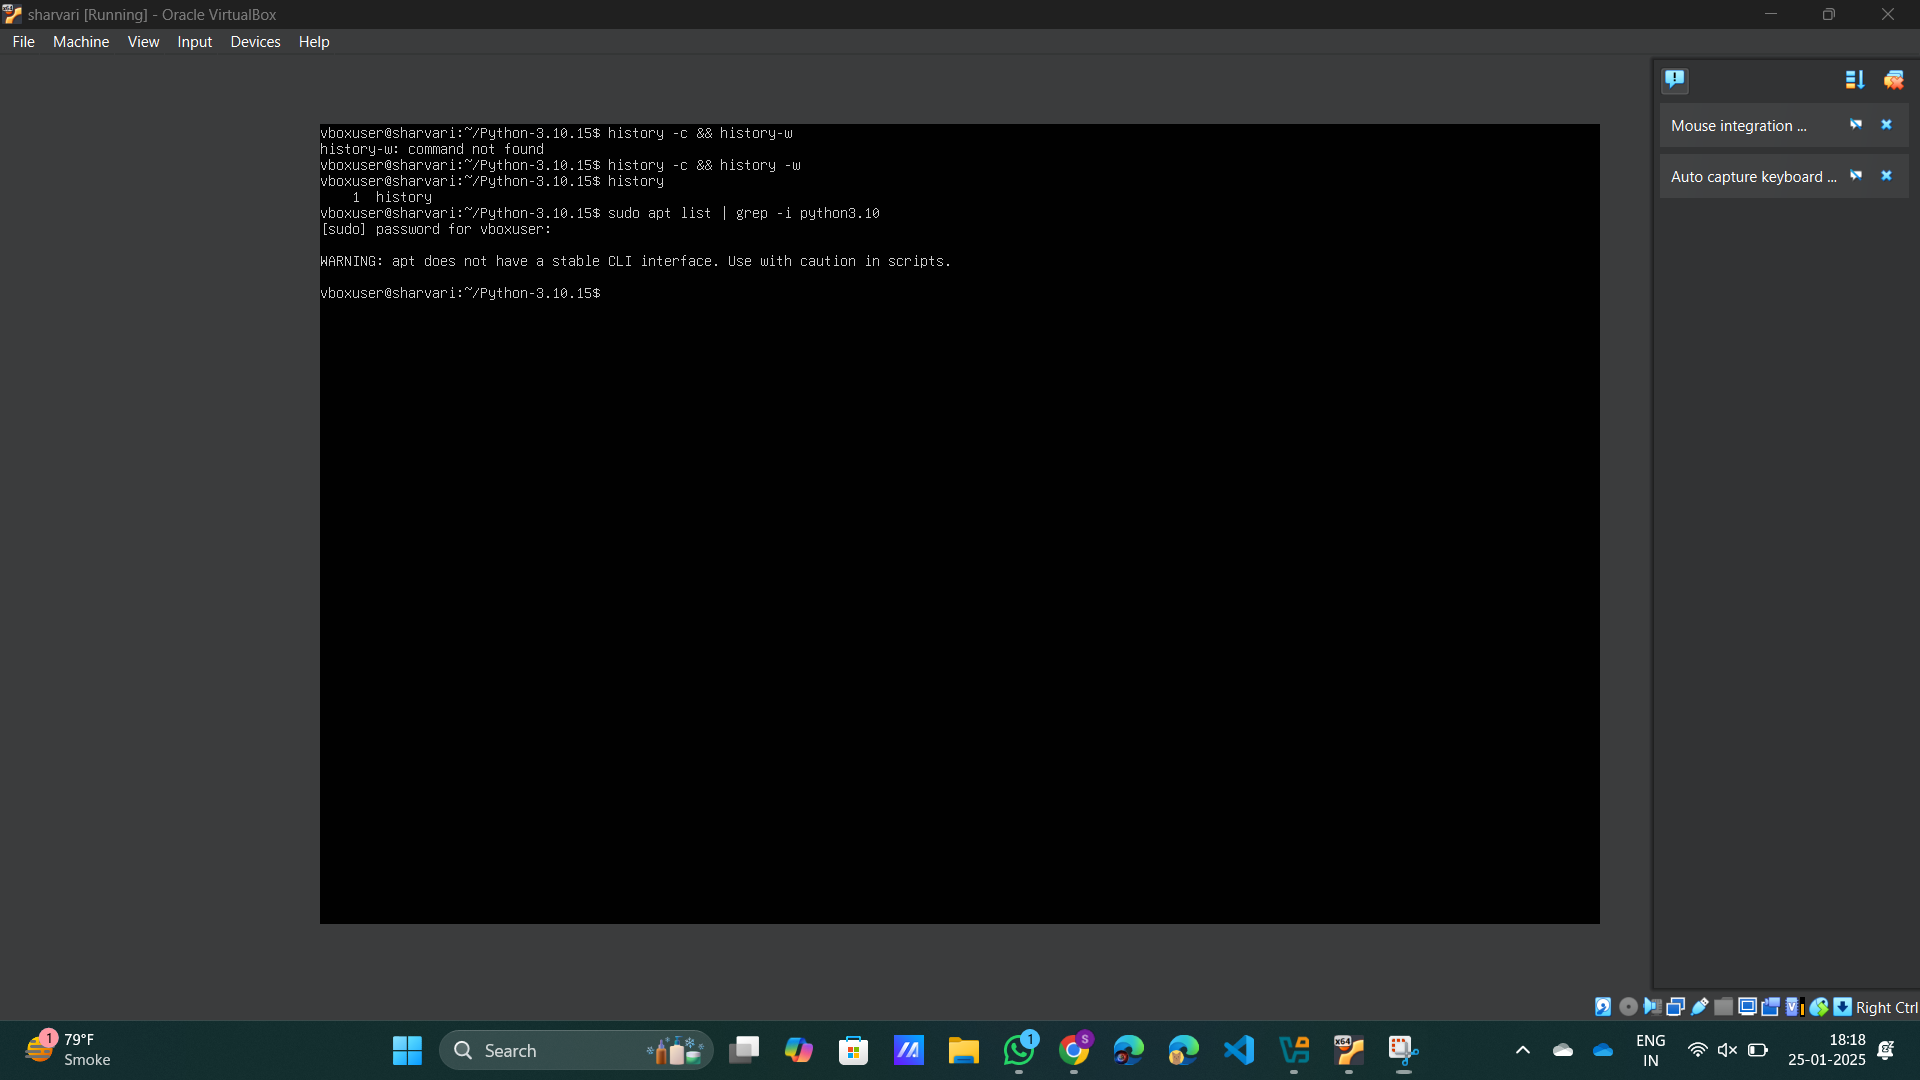

## Downloading the Pyton 3.10.15 Source

```bash
lynx https://www.python.org/downloads/source/
gzip -d Python-3.10.15.tgz
tar -xf Python-3.10.15.tar
```

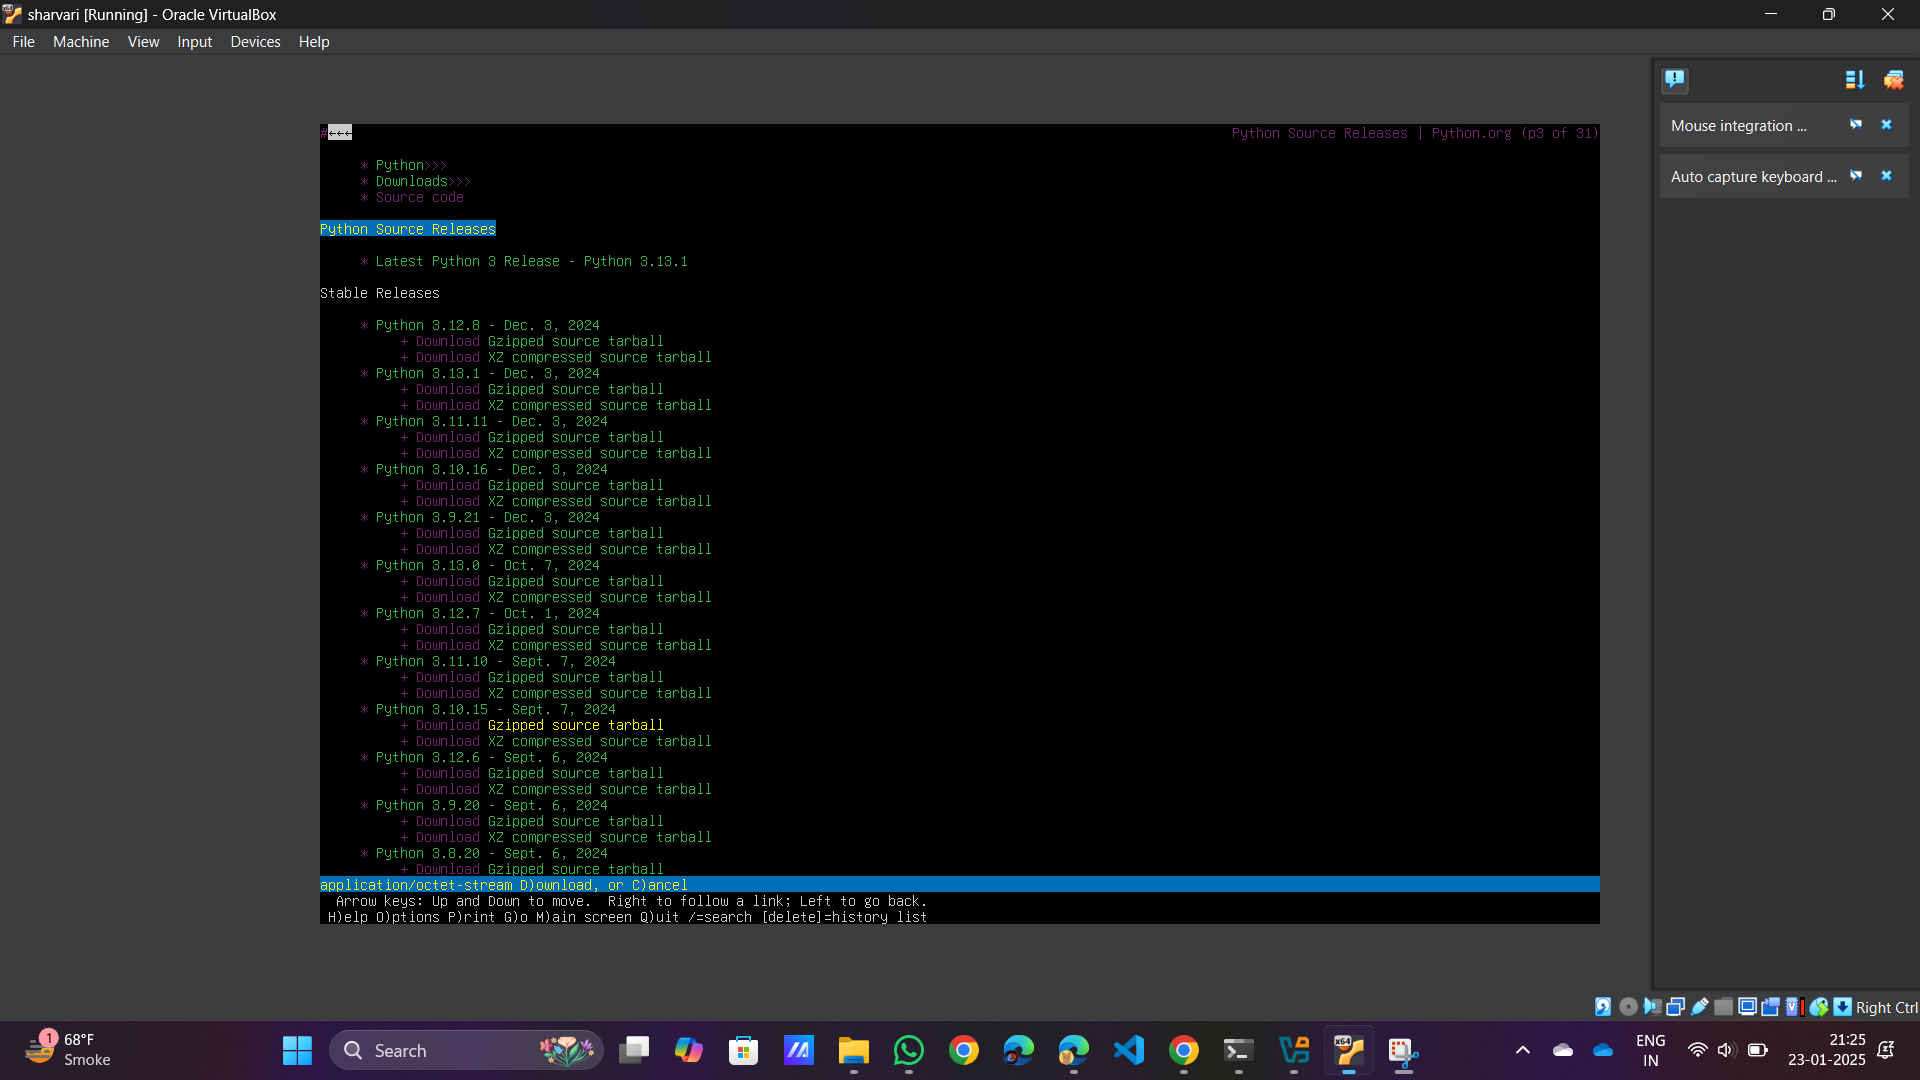

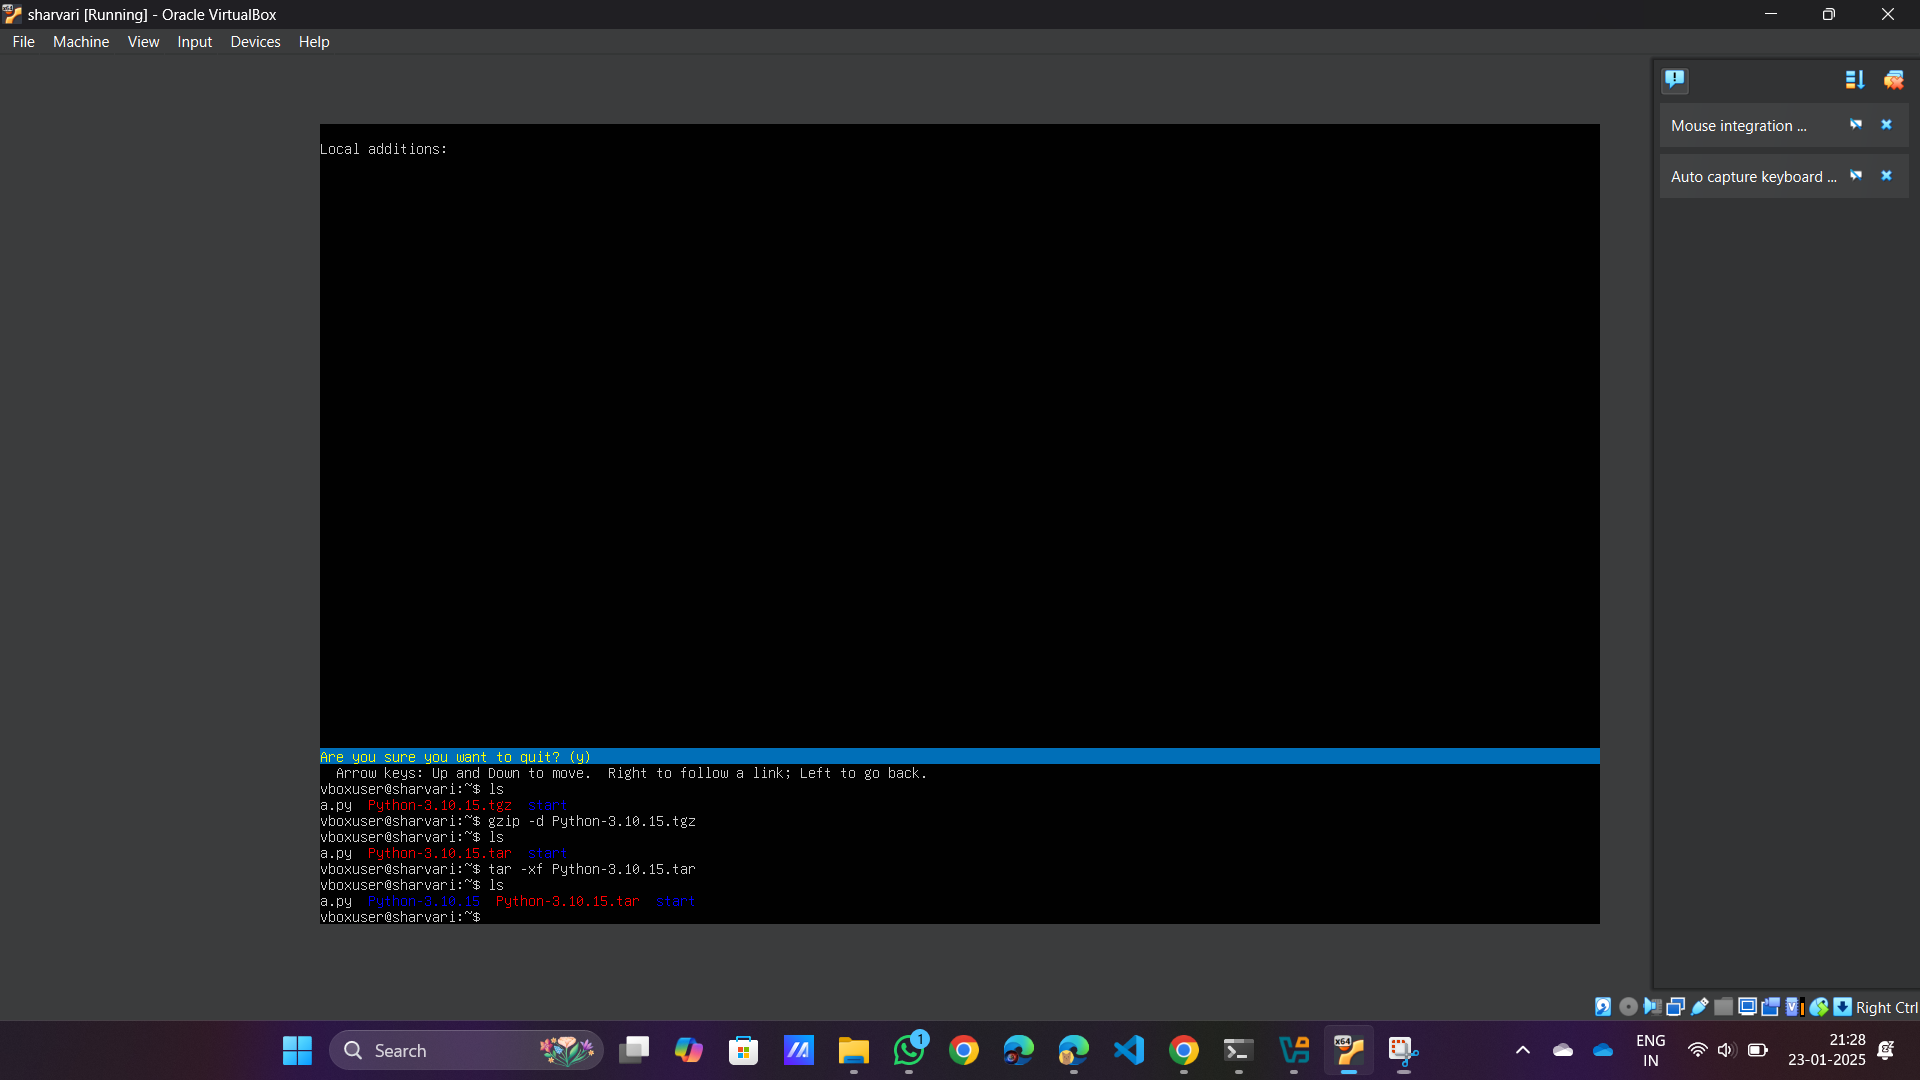

## Downloading openssl

```bash
wget openssl.org/source/openssl-1.1.1t.tar.gz
gzip -d openssl-1.1.1t.tar.gz
tar -xf openssl-1.1.1t.tar
```



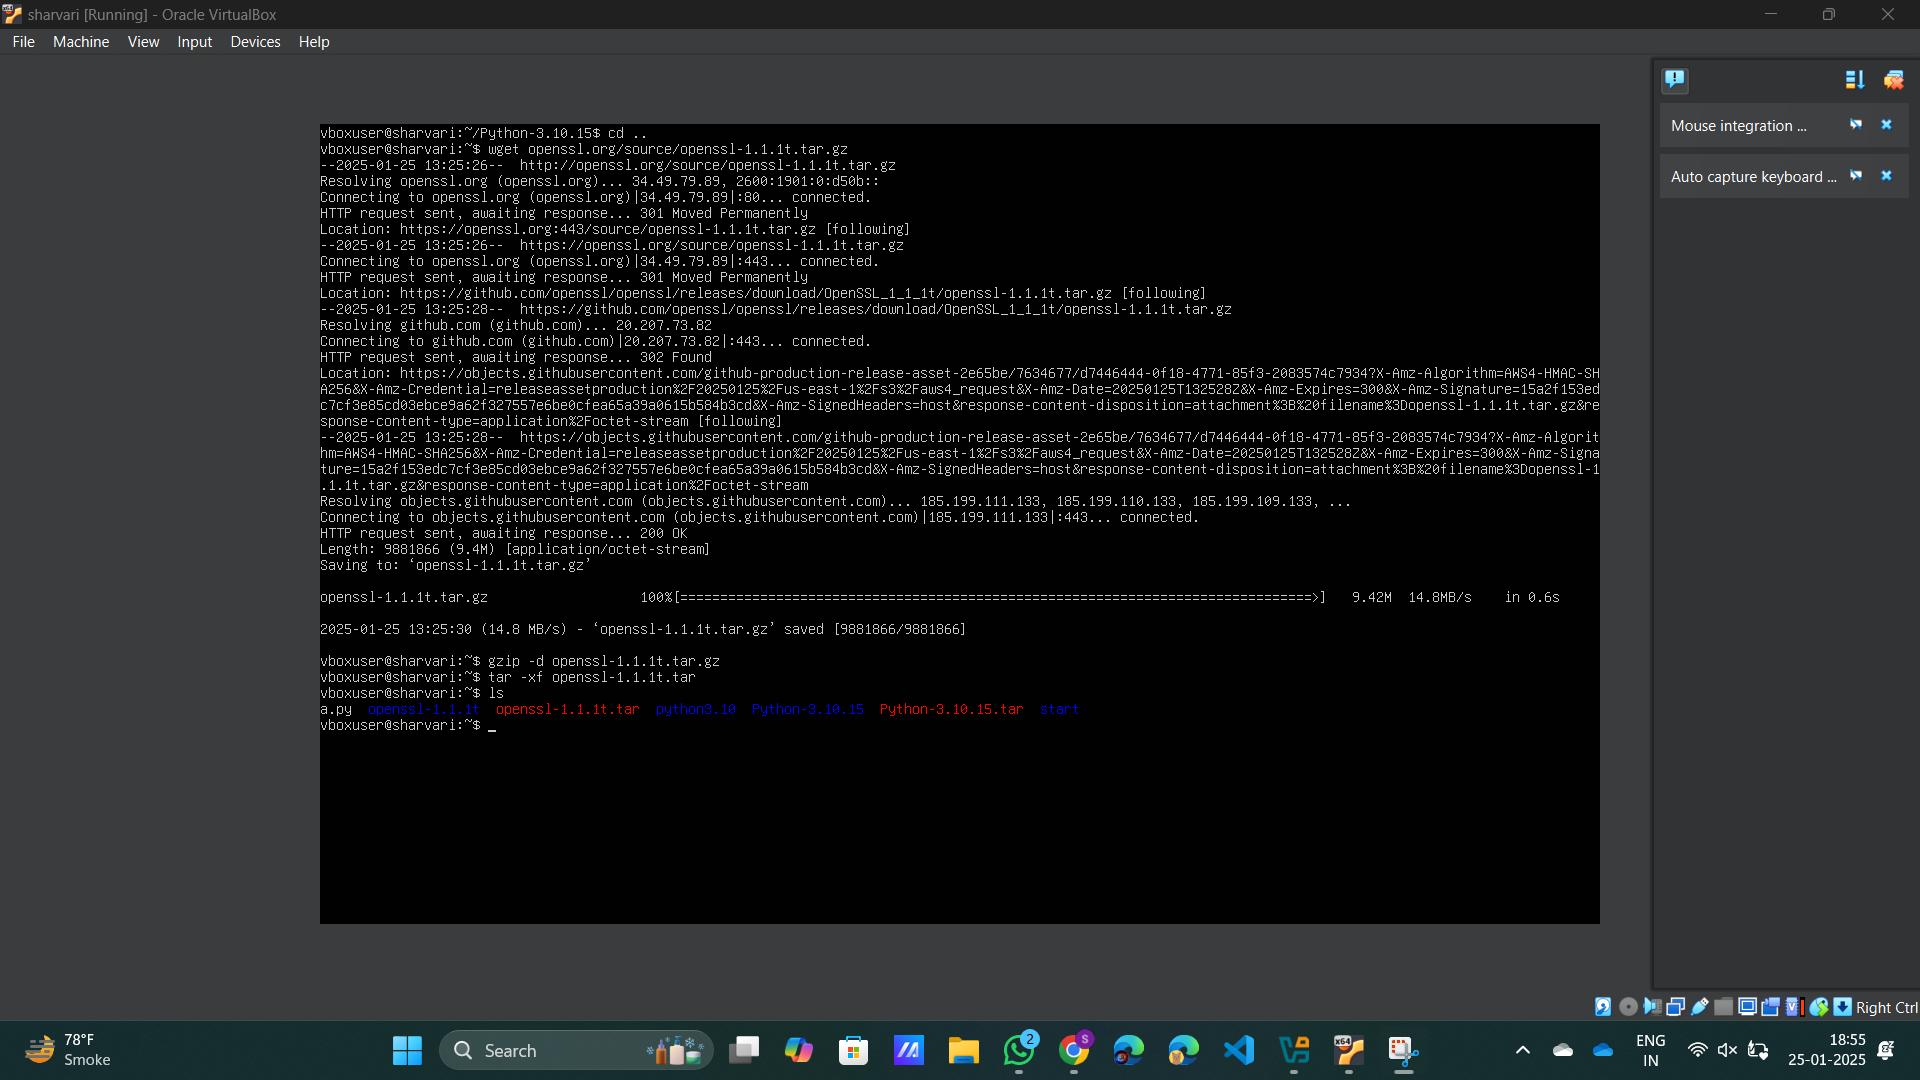

## Installing openssl

```bash
./config --prefix=$HOME/openssl --openssldir=$HOME/openssl shared zlib
vim Makefile
make -j5
make install
```

We editted the makefile so that the program comiles with the `-O0` and `-g0` flags

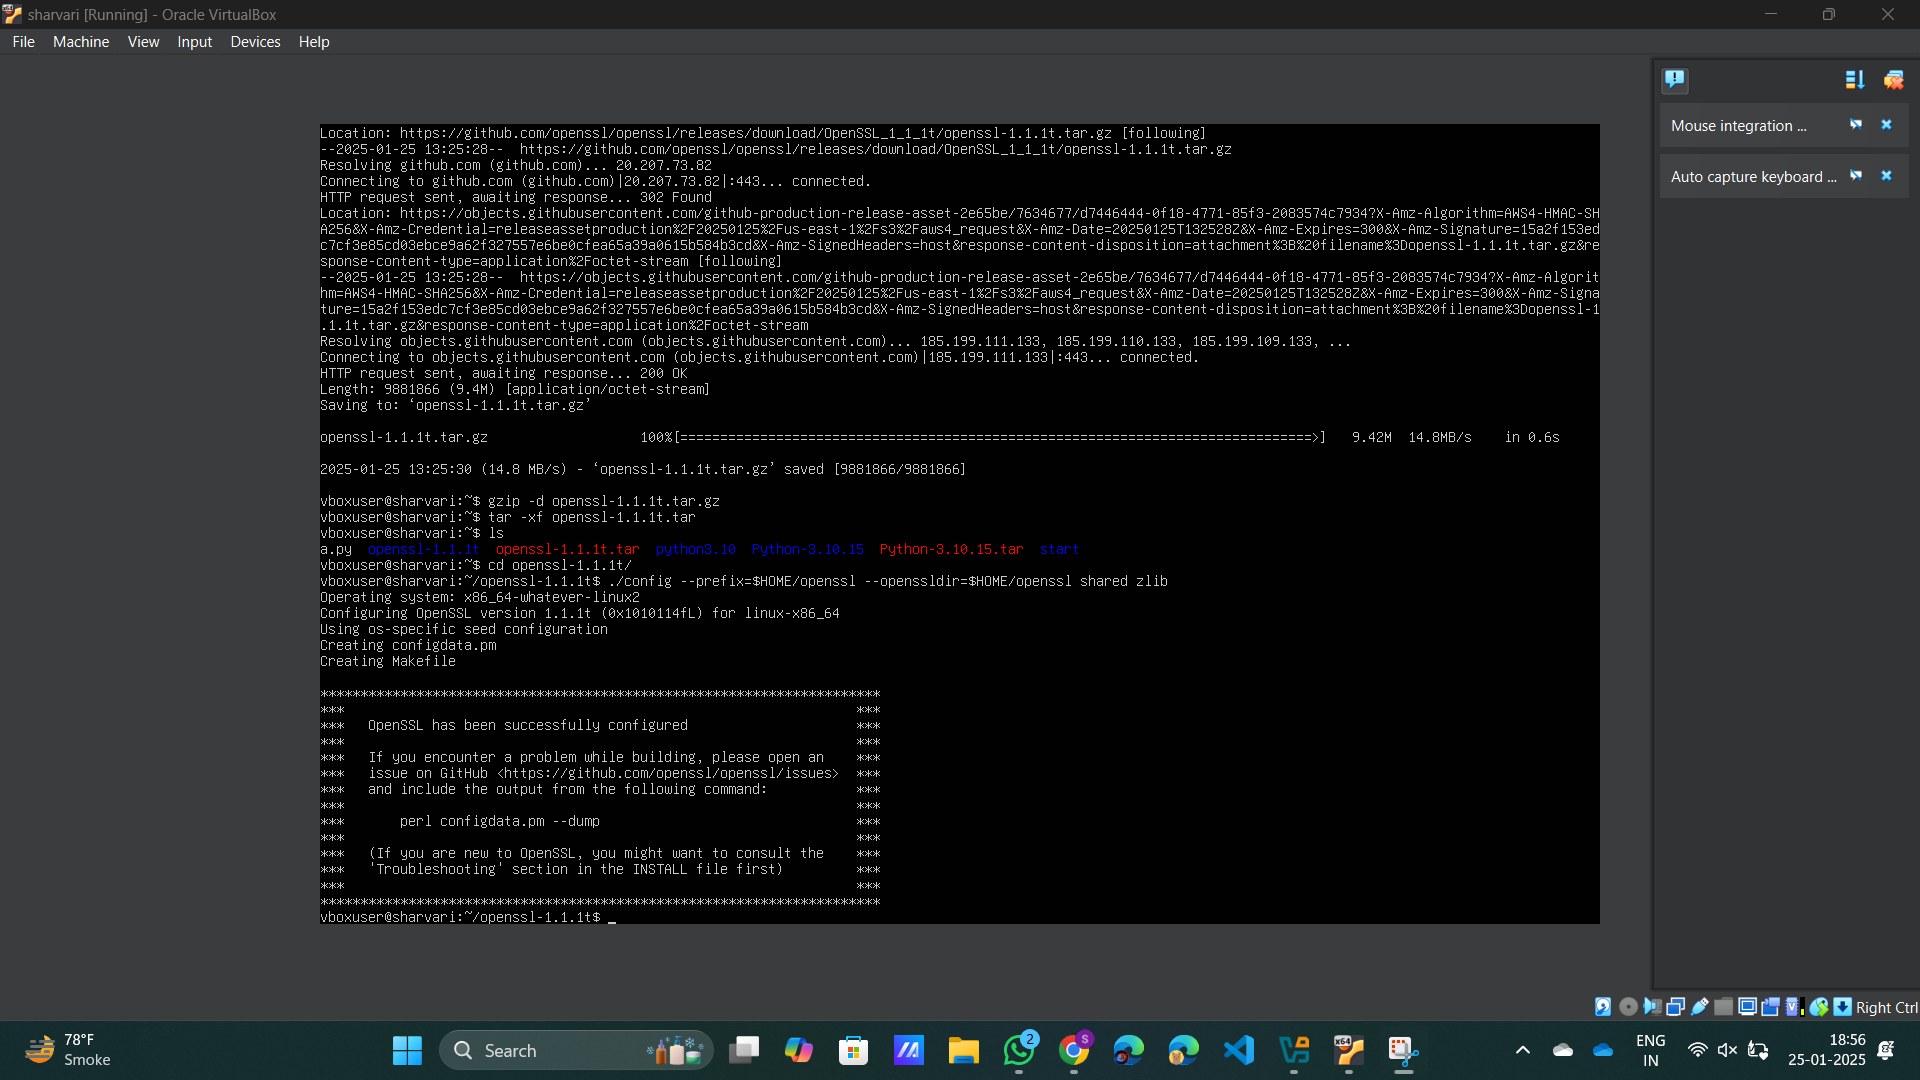

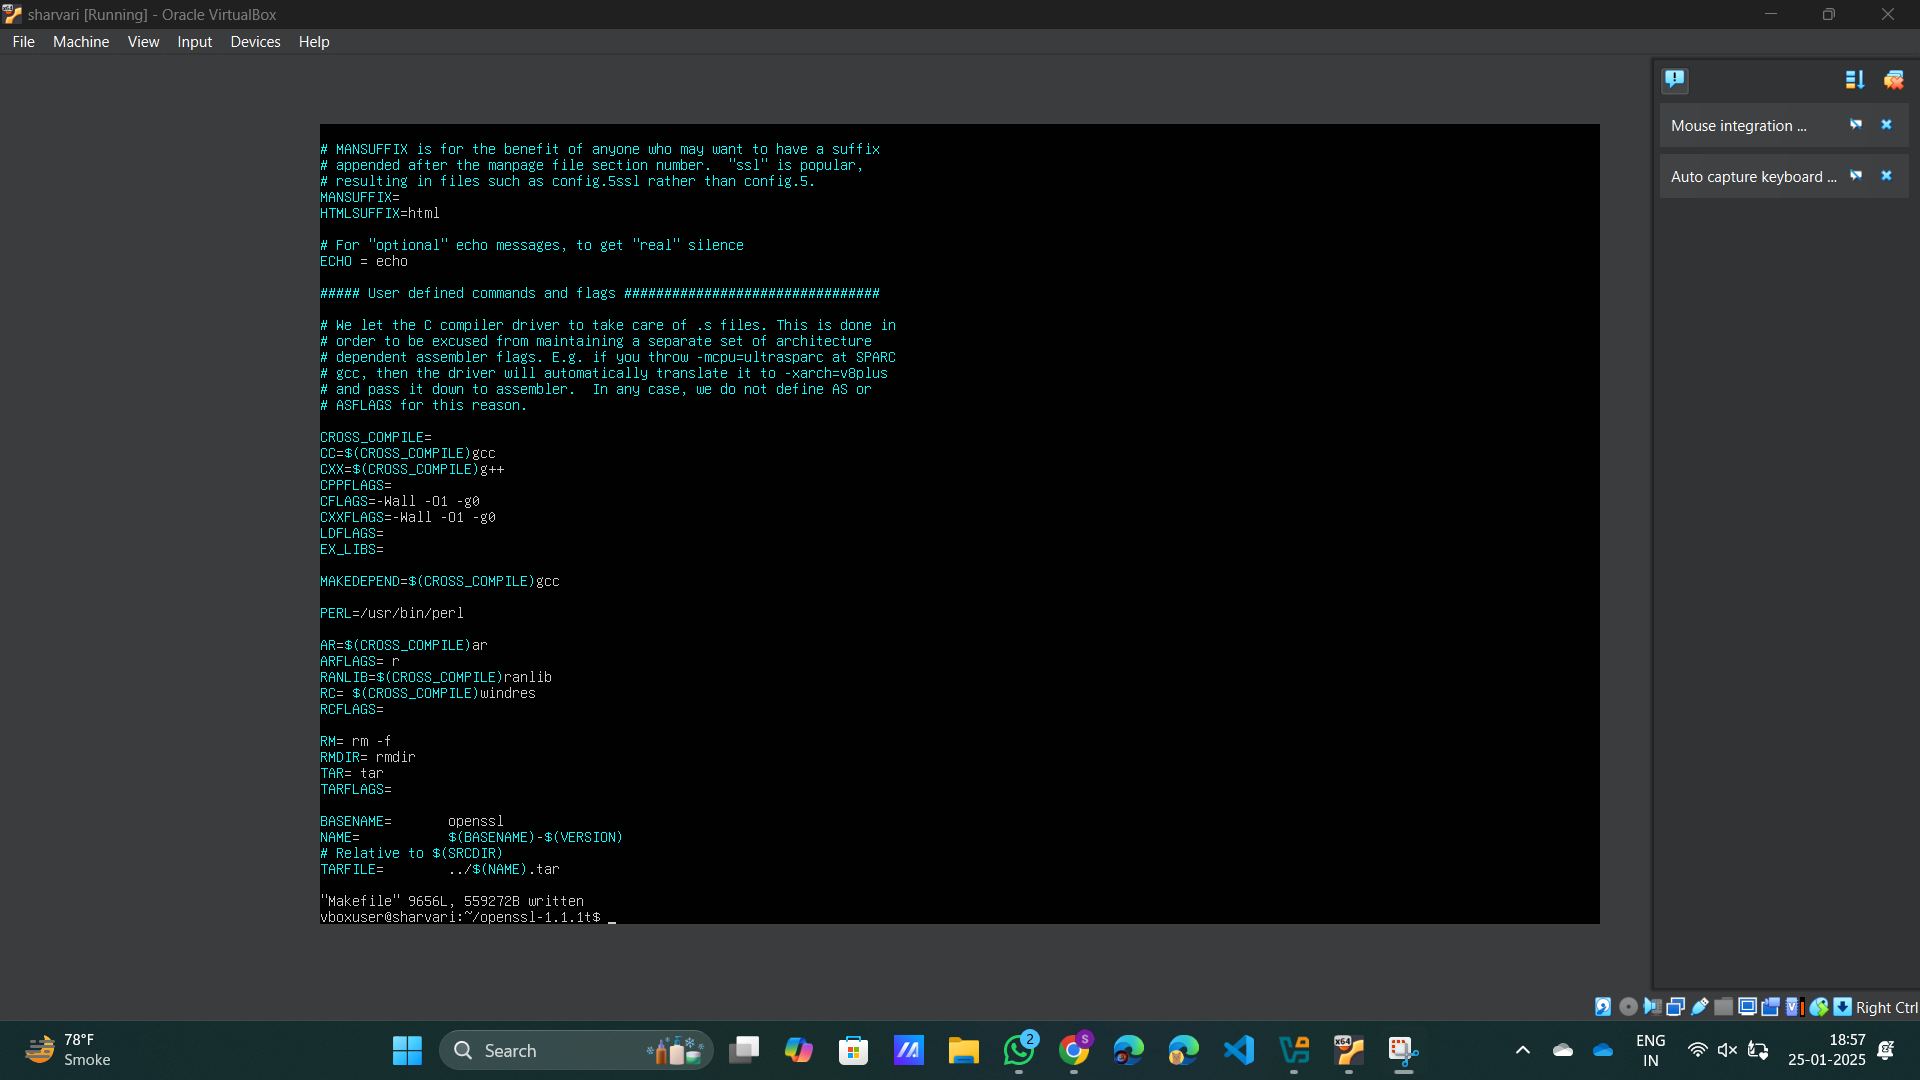

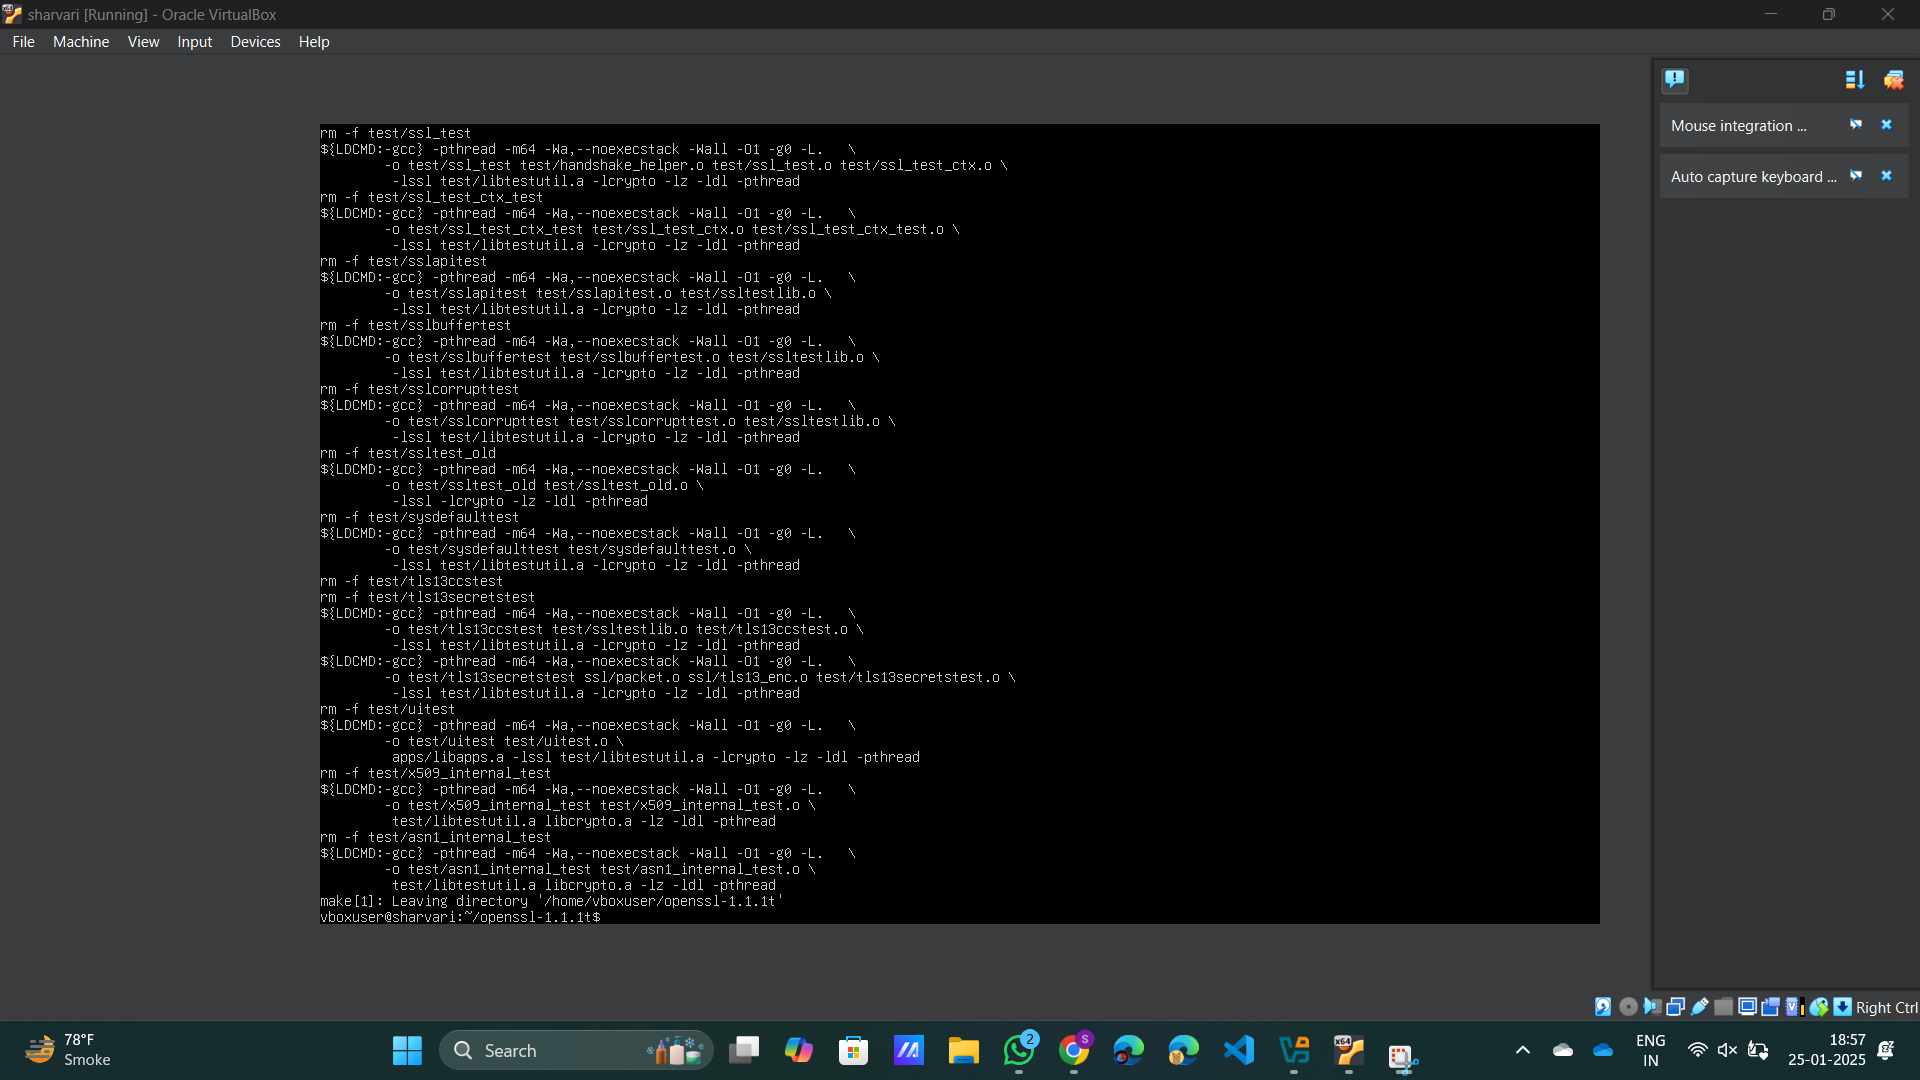

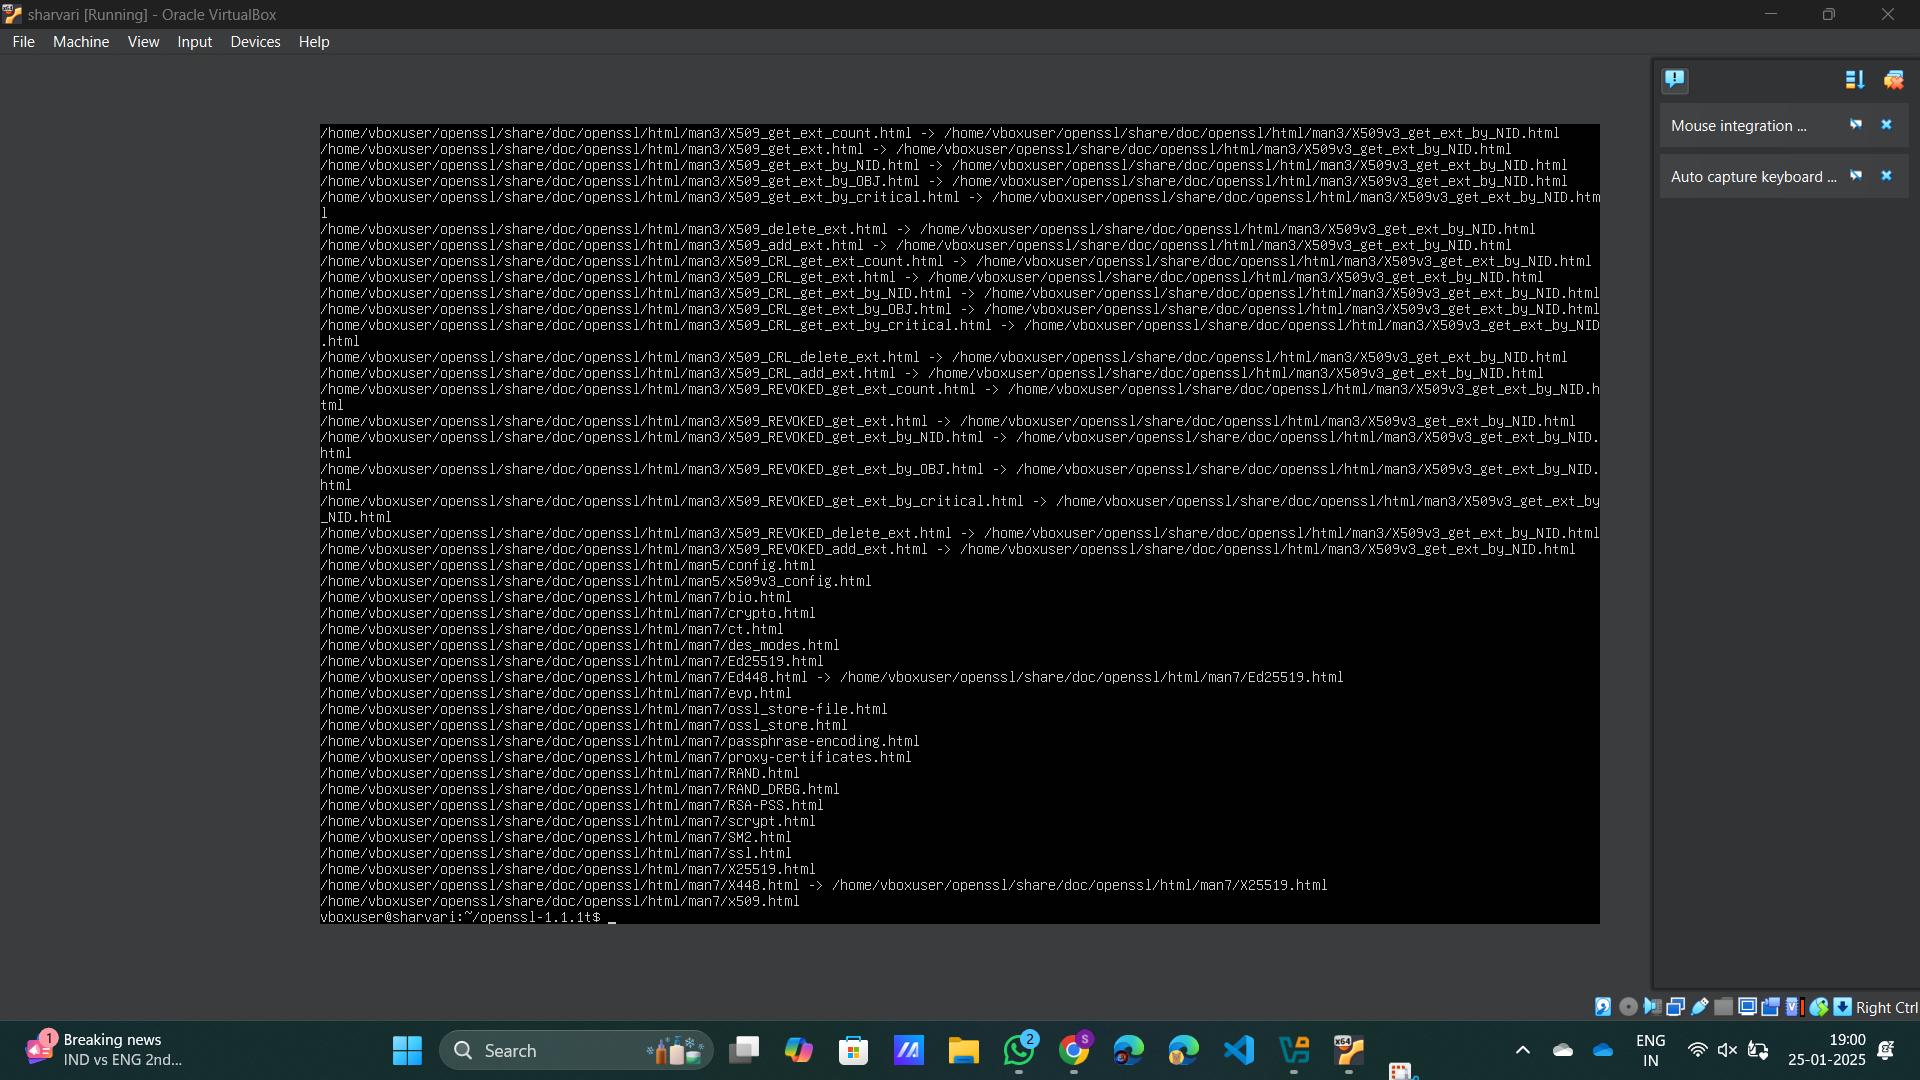

## Editing Bash Profile

```sh
vim ~/.bashrc
source ~/.bashrc
```

We added the following lines into the bashrc file:

```sh
export LD_LIBRARY_PATH=$HOME/openssl/lib:$LD_LIBRARY_PATH
export PATH=$HOME/openssl/bin:$PATH
```

This modifies the `ld.so` behaviour to check for link objects in the openssl directory as well.

Also now  bash checks for changes binary files in the openssl directory.

***This is very important for the Python3.10.15 setup***

## Verification of Flags

```sh
echo "$LD_LIBRARY_PATH"
echo "$PATH"
export CFLAGS="-I$HOME/openssl/include"
echo "$CFLAGS"
export LDFLAGS="-I$HOME/openssl/lib"
echo "$LDFLAGS"
```

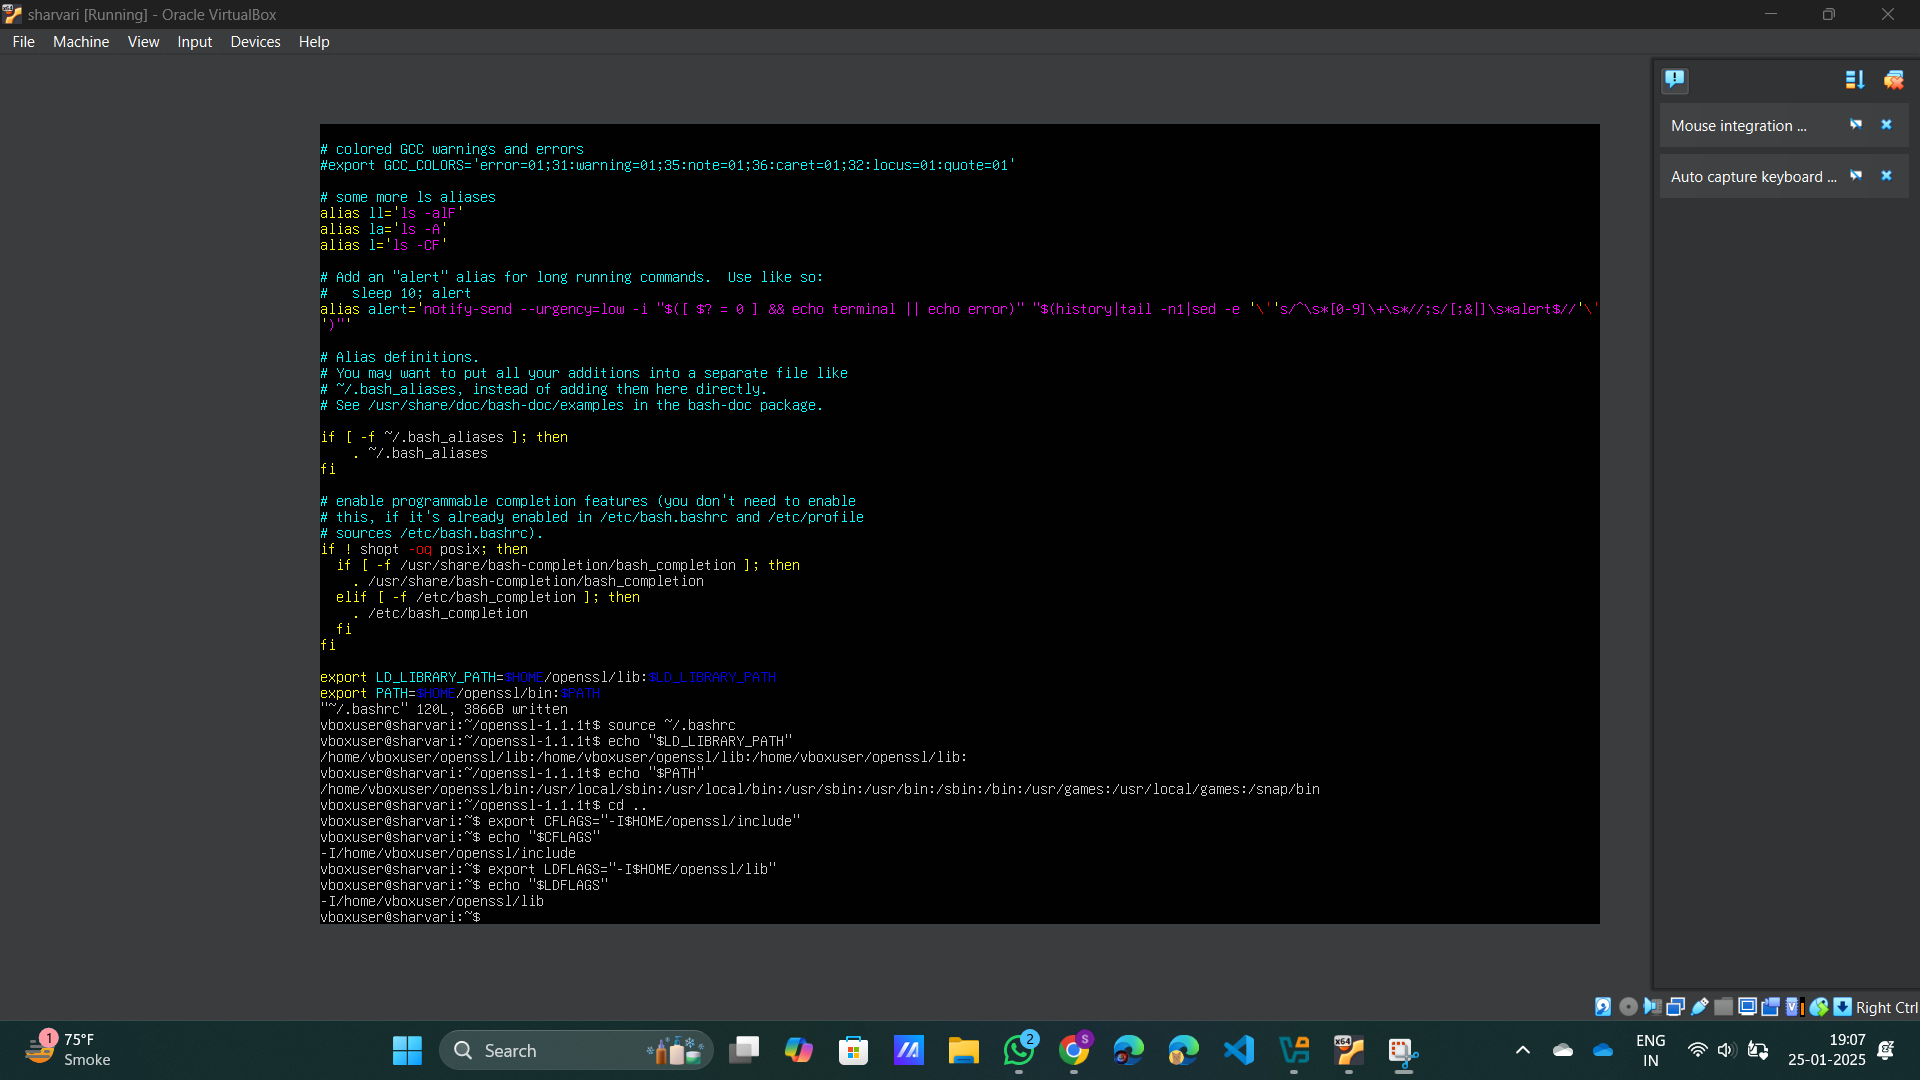

## Building Python 3.10.15

```sh
cd Python-3.10.15/
./configure --prefix=$HOME/python3.10 --with-openssl=$HOME/openssl
vim Makefile
make -j5
make install -j10
```

We editted the makefile so that the program comiles with the `-O0` and `-g0` flags

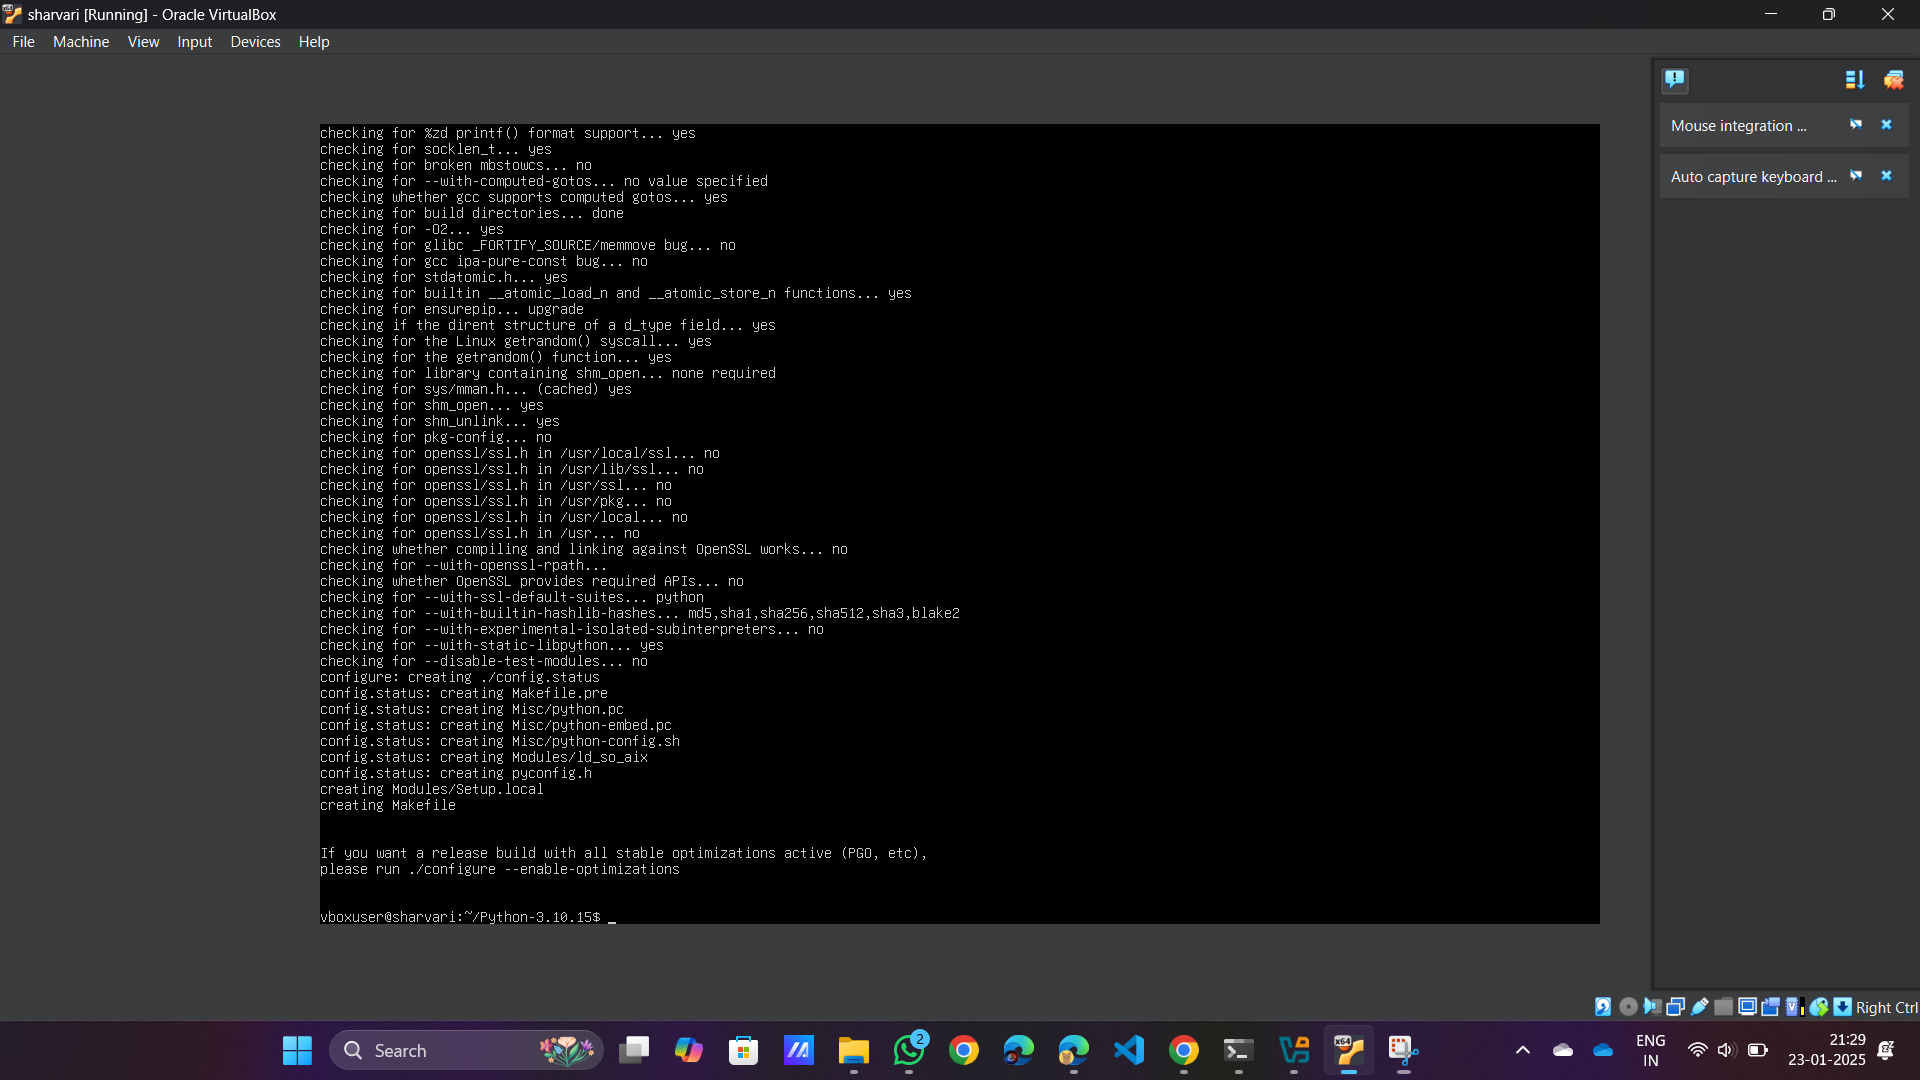

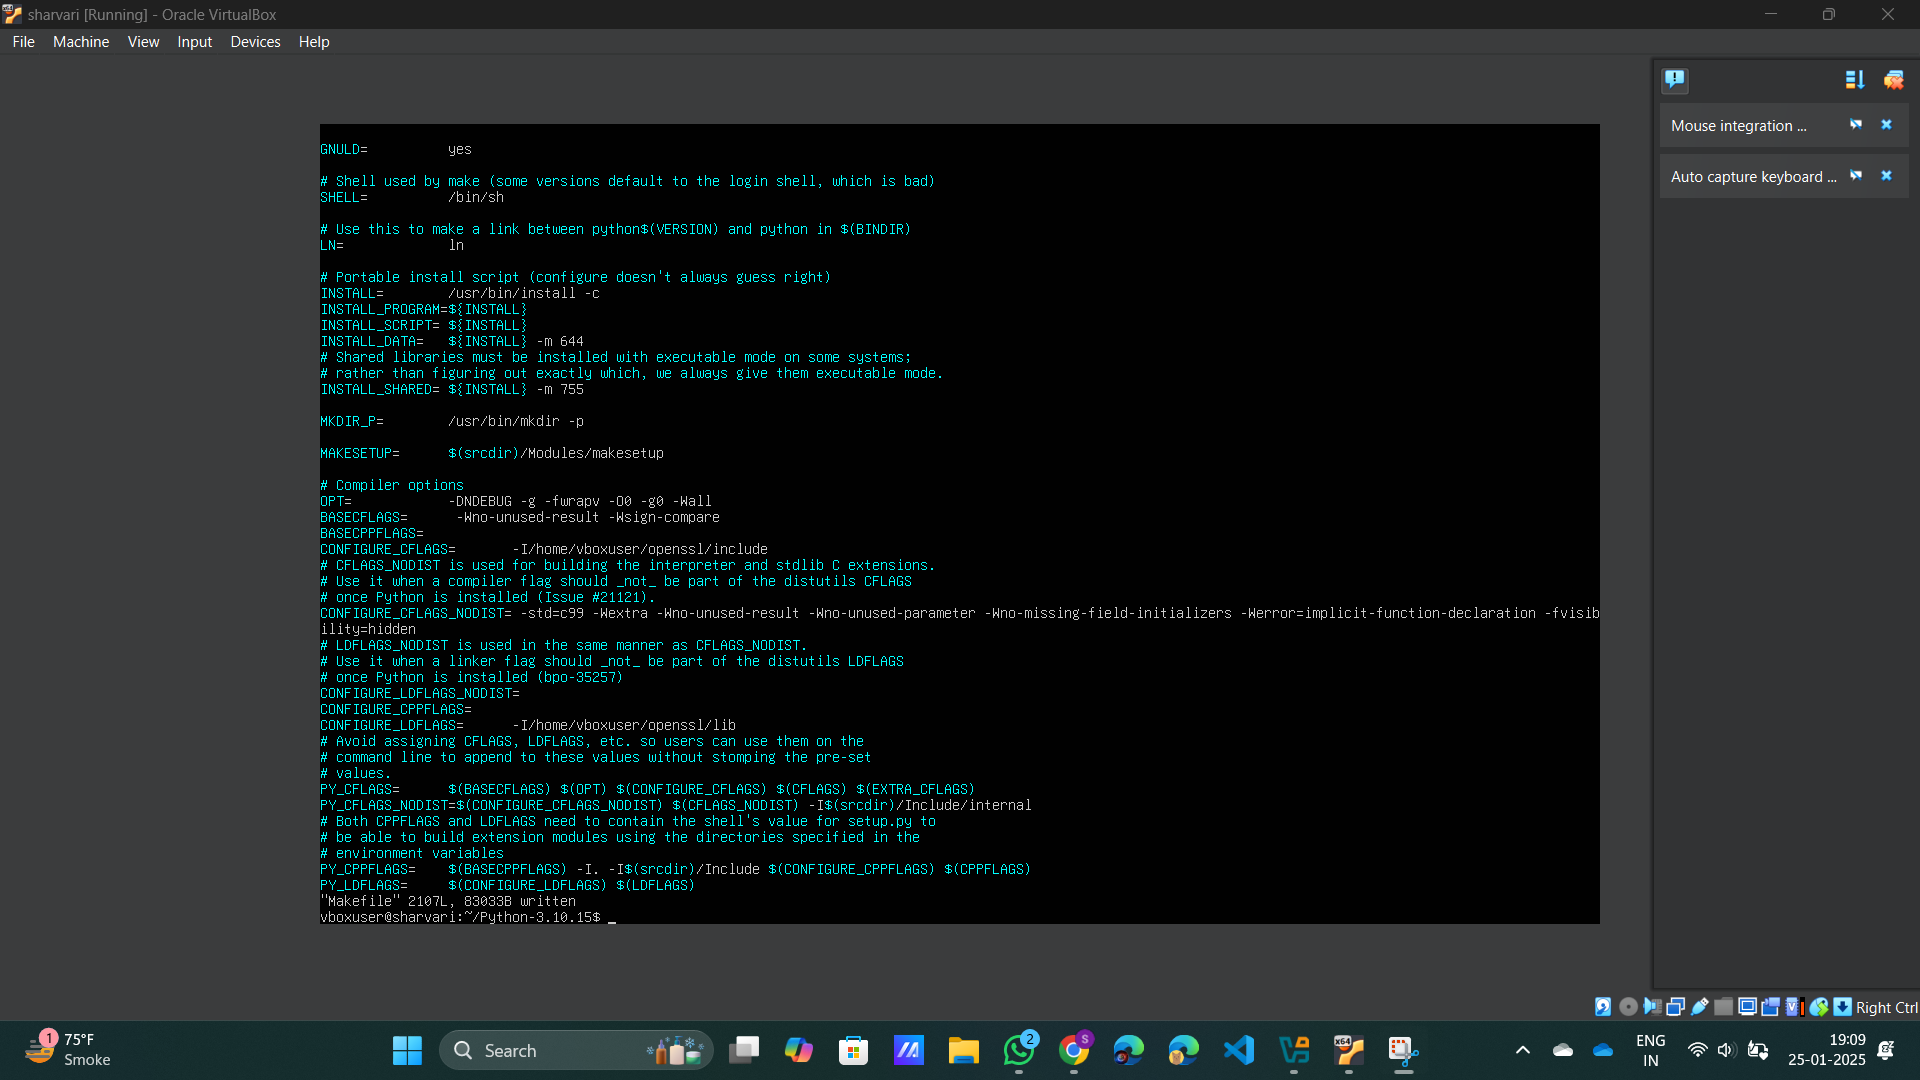

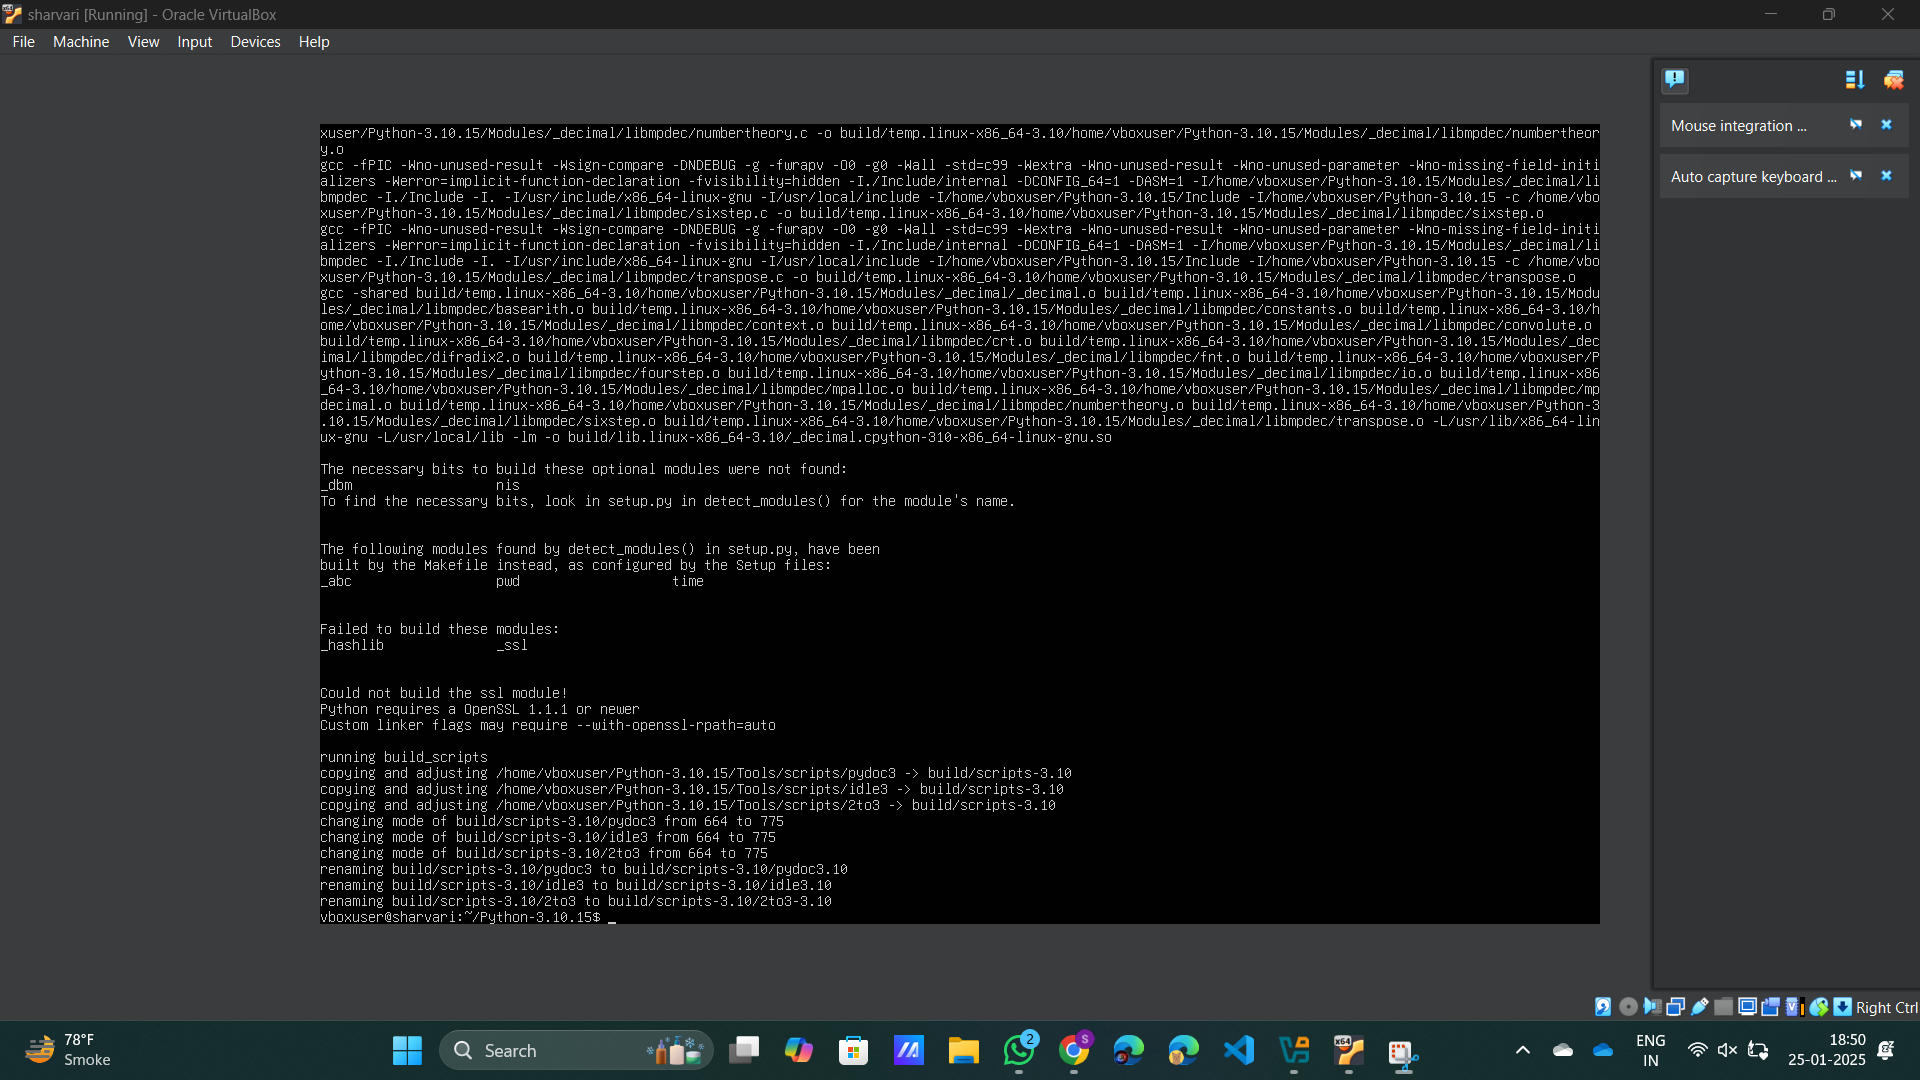

## Adding Python to Path

```sh
vim ~/.bashrc
source ~/.bashrc
```

We modified the `$PATH` Export to:


```sh
export PATH=$HOME/openssl/bin:$HOME/python3.10/bin:$PATH
```

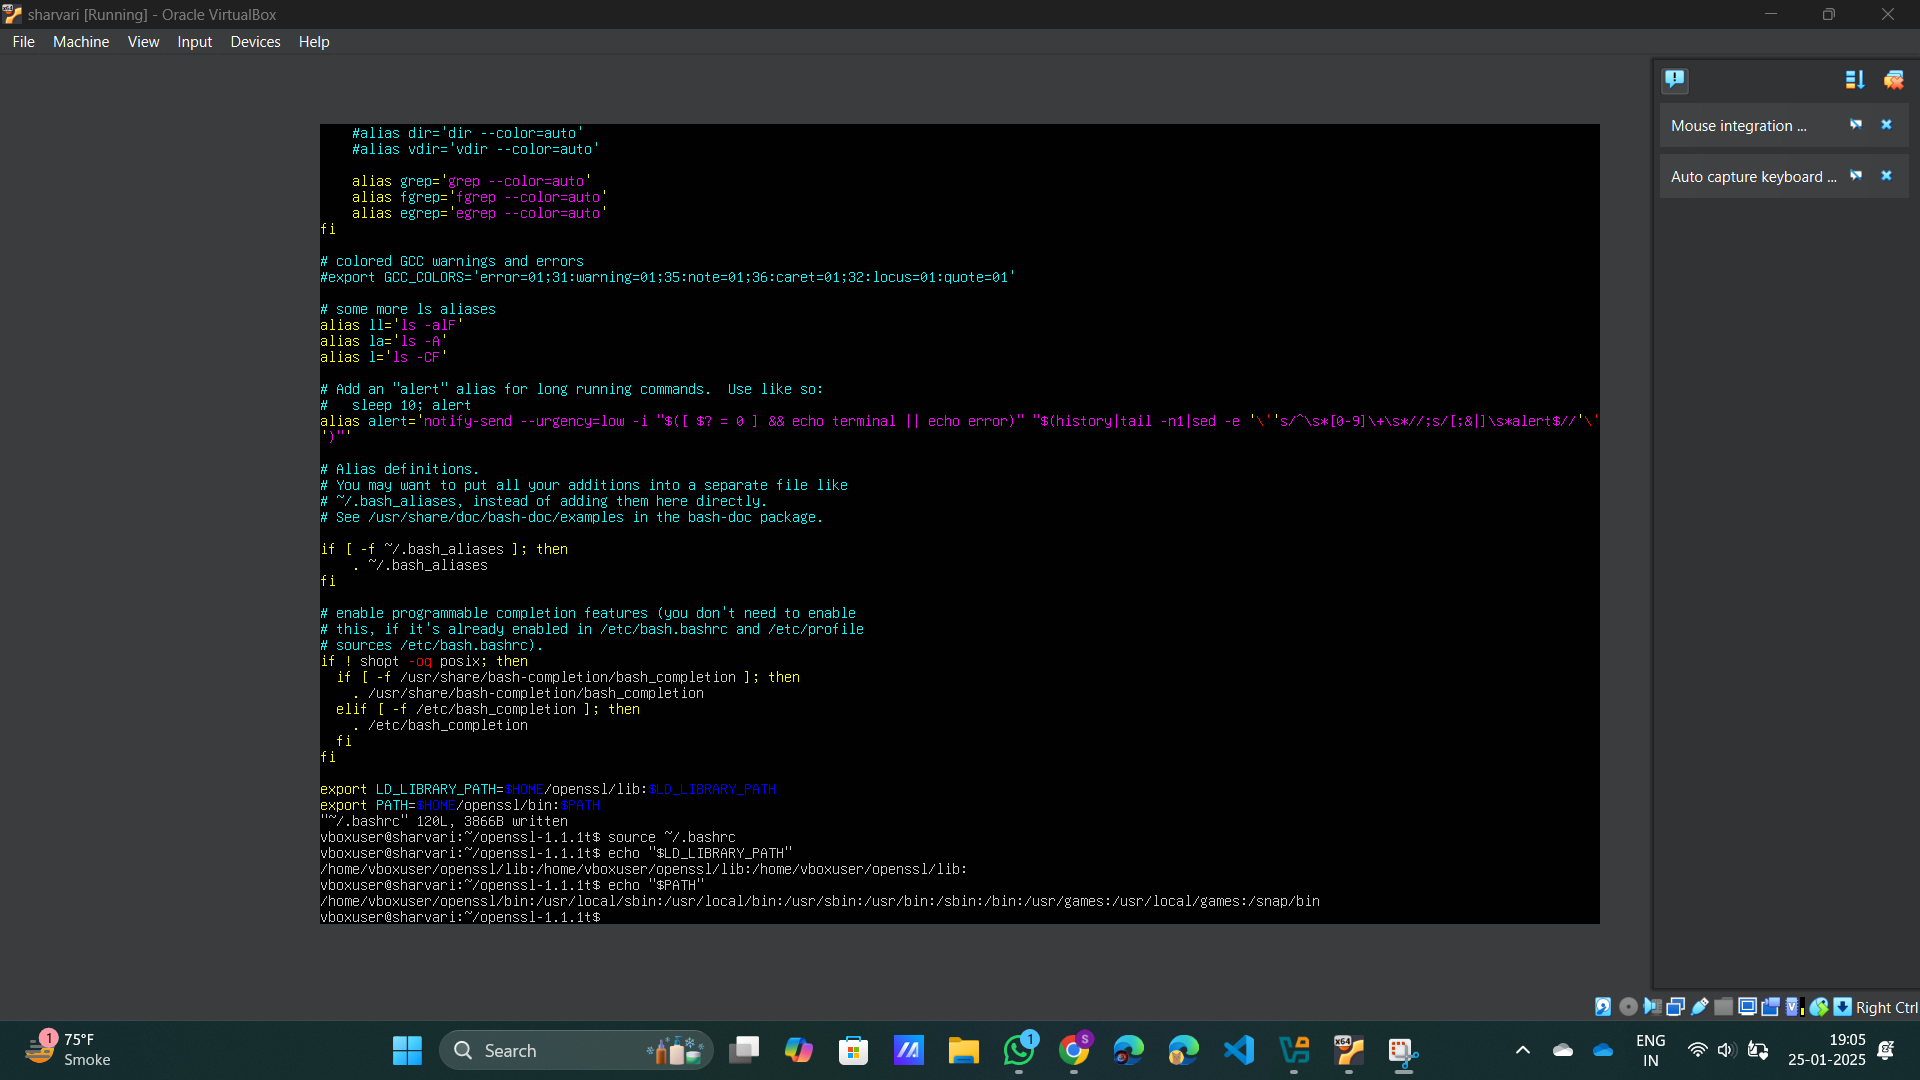

## Installing Pip and Label Studio

```sh
python3.10 -m ensurepip
python3.10 -m pip install --upgrade pip
python3.10 -m pip install venv
python3.10 -m pip install label-studio
```

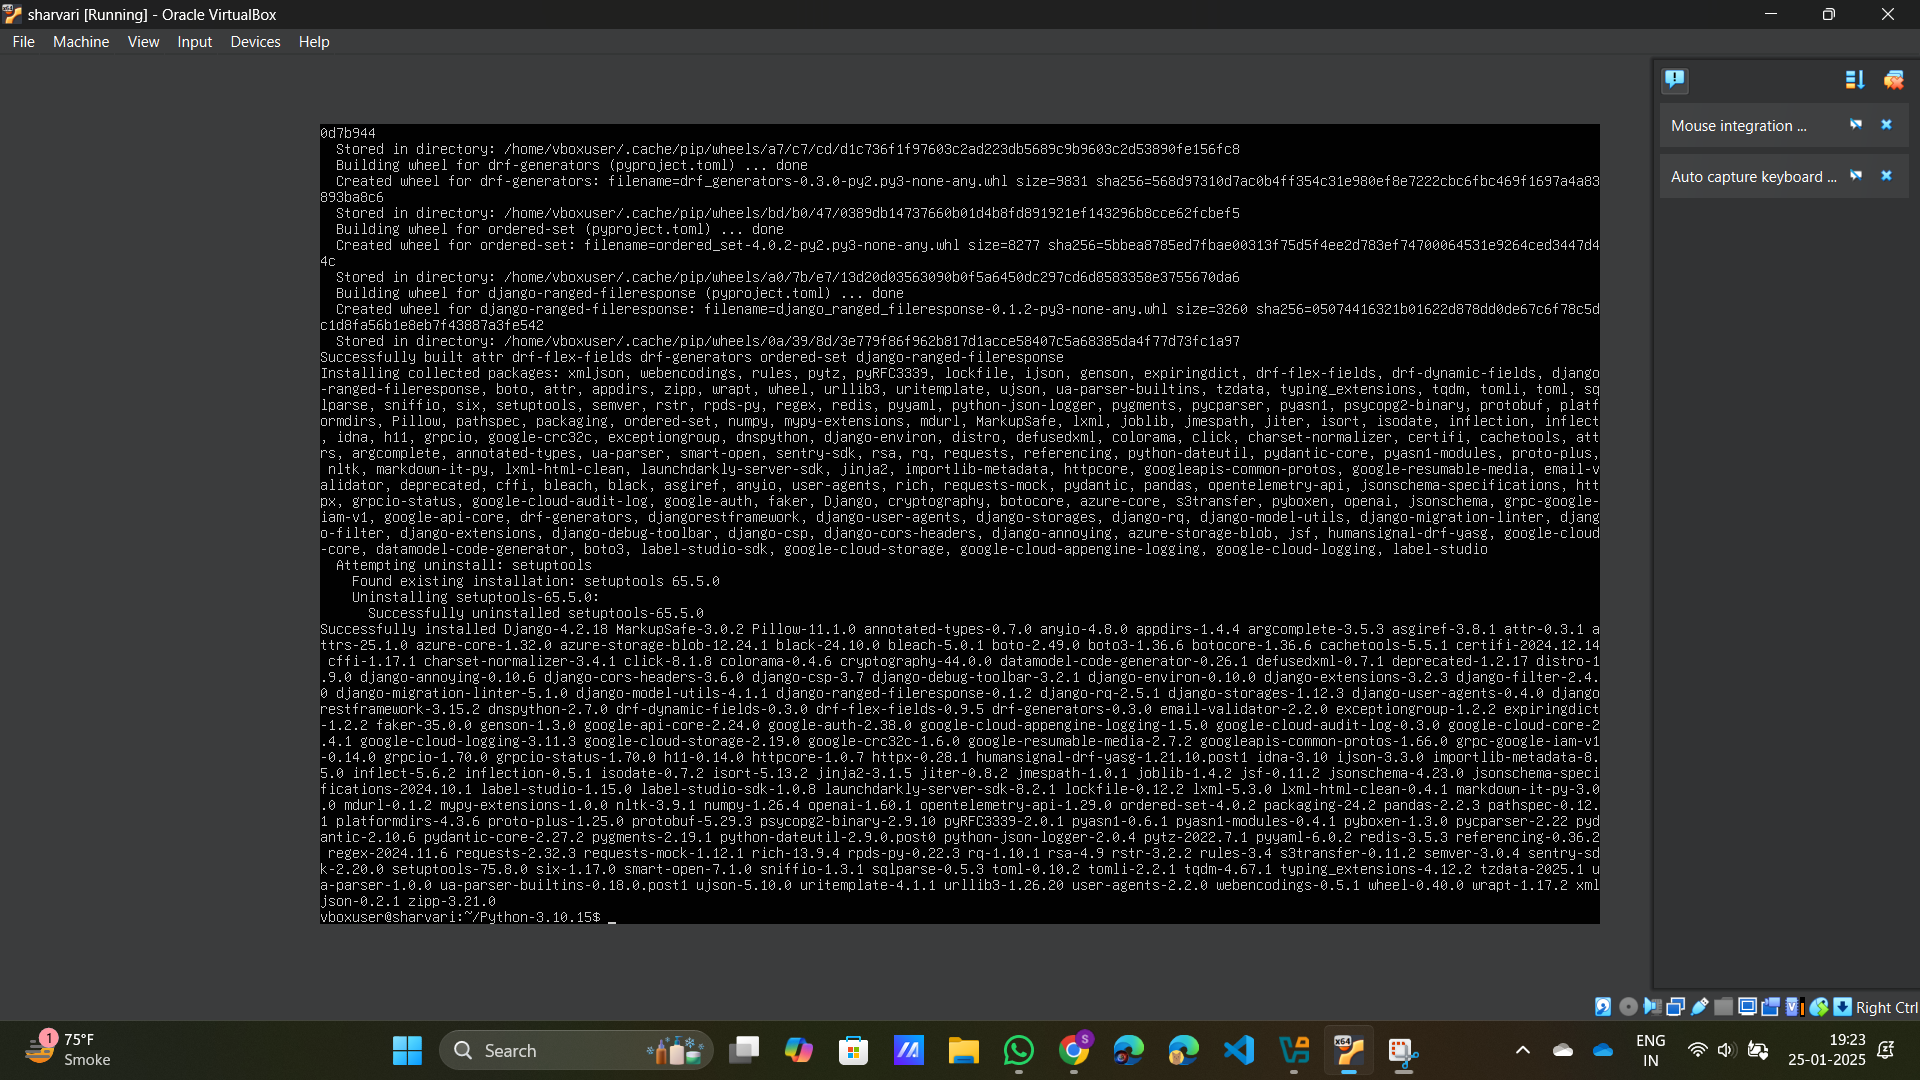

## Starting Label Studio

```sh
label-studio
```

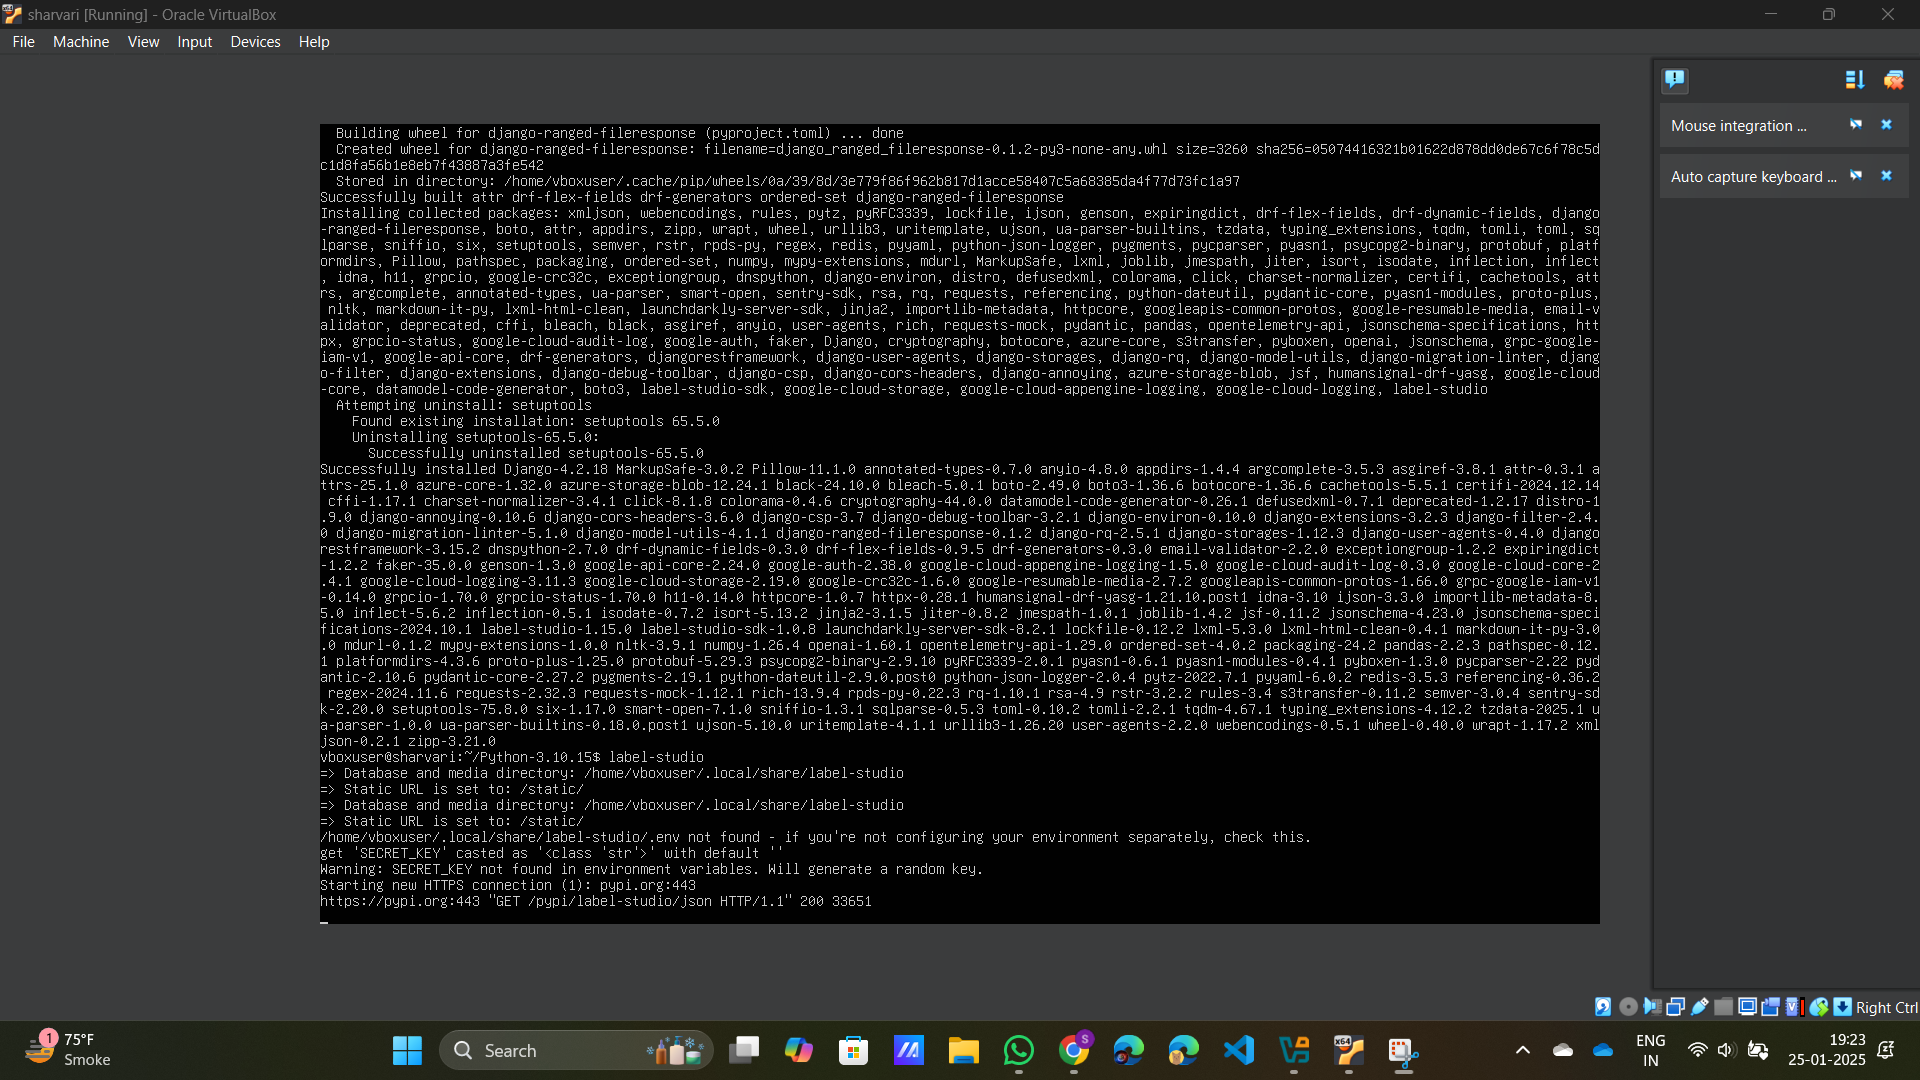

# NLP

## Importing Data from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Imports

- We will import pandas for reading csv.
- We need JSON module to decipher the JSON string in the CSV
- We will use `sklearn` to find the Cohen's Kappa
- We will use `statsmodel` to find Fleiss Kappa

In [ ]:
import pandas as pd
import json
from sklearn.metrics import cohen_kappa_score
from statsmodels.stats.inter_rater import fleiss_kappa

## Catagory List

In [ ]:
catagories = [
    "NOUN",
    "PROPN",
    "VERB",
    "ADJ",
    "ADV",
    "ADP",
    "PRON",
    "DET",
    "CONJ",
    "PART",
    "PRON_WH",
    "PART_NEG",
    "NUM",
    "X"
]

## Data Preproccess

- The function gives out a list of 2 list which contains the data of Annotator A (Vivek Raj) and Annotator B (Sharvari Mirge) respectively

- The function converts the word to catagory mapping to a flattened list

- If the annotators have rated the same word it will append the respective catagory indeices

- If one of the annotator has missed a word then the second annotator will get the marked catagory and the missed rating will default to an `X`

In [ ]:
def Proccess(cat1, cat2):
  mega_list = [[], []]
  for index in range(len(cat1)):
    word_list = []
    rater = []
    data = json.loads(cat1[index])
    for x in data:
      word_list.append(x['text'].strip())
      rater.append(x['labels'][0])

    word_list_p = []
    rater_p = []
    data = json.loads(cat2[index])
    for x in data:
      word_list_p.append(x['text'].strip())
      rater_p.append(x['labels'][0])

    for x in range(len(word_list)):
        try:
          index = word_list_p.index(word_list[x])
          rate_1 = catagories.index(rater[x])
          rate_2 = catagories.index(rater_p.pop(index))
          word_list_p.pop(index)
          mega_list[0].append(rate_1)
          mega_list[1].append(rate_2)

        except ValueError:
          rate_1 = catagories.index(rater[x])
          rate_2 = catagories.index("X")
          mega_list[0].append(rate_1)
          mega_list[1].append(rate_2)

    for x in range(len(word_list_p)):
      try:
        index = word_list.index(word_list_p[x])
        rate_1 = catagories.index(rater[index])
        rate_2 = catagories.index(rater_p[x])
        mega_list[0].append(rate_1)
        mega_list[1].append(rate_2)

      except ValueError:
          rate_1 = catagories.index("X")
          rate_2 = catagories.index(rater_p[x])
          mega_list[0].append(rate_1)
          mega_list[1].append(rate_2)


  return mega_list


## Finding Cohen's Kappa

- We will import the csv file using pandas as `df1` and `df2`.
- We will preprocess the `label` data and get the rating scores.
- We will send the rating scores to the `cohen_kappa_score` function of `sklearn`.


In [ ]:
data_file_1 = "/content/drive/MyDrive/Lab3STT For AI/project-4-at-2025-01-23-14-31-163ea5ce.csv"
data_file_2 = "/content/drive/MyDrive/Lab3STT For AI/project-3-at-2025-01-23-21-08-a19a55a3.csv"

df1 = pd.read_csv(data_file_1)
df1
# print()
df2 = pd.read_csv(data_file_2)[1:]
df2

data = Proccess(df1['label'].to_list(), df2['label'].to_list())
print("Rater A", data[0])
print("Rater B", data[1])
print("Cohen's Kappa: ", cohen_kappa_score(data[0], data[1]))






Rater A [0, 0, 2, 0, 2, 0, 8, 2, 2, 0, 13, 5, 5, 0, 2, 1, 6, 4, 2, 2, 1, 1, 1, 13, 13, 5, 5, 5, 13, 13, 0, 4, 2, 0, 2, 4, 1, 0, 1, 1, 13, 13, 5, 5, 13, 13, 1, 2, 1, 0, 11, 1, 4, 13, 1, 5, 5, 13, 13, 13, 13, 13, 13, 13, 1, 2, 4, 0, 3, 2, 13, 1, 2, 0, 13, 5, 5, 1, 0, 13, 1, 5, 1, 4, 2, 5, 1, 5, 5, 5, 0, 1, 13, 2, 4, 1, 13, 1, 5, 2, 1, 5, 0, 12, 0, 5, 12, 0, 5, 3, 2, 1, 13, 13, 13, 13, 2, 0, 8, 0, 0, 2, 3, 1, 1, 13, 13, 1, 13, 13, 13, 13, 13, 13, 13, 13, 13, 1, 5, 5, 2, 1, 1, 13, 5, 2, 13, 1, 13, 1, 0, 3, 3, 1, 5, 5, 5, 2, 4, 13, 13, 1, 1, 1, 13, 13, 4, 1, 5, 4, 0, 4, 5, 4, 1, 5, 1, 5, 0, 2, 4, 13, 13, 13, 13, 13, 13, 13, 13, 13, 1, 1, 5, 0, 1, 13, 0, 1, 5, 2, 4, 1, 3, 2, 4, 1, 13, 13, 13, 13, 13, 2, 13, 1, 3, 3, 0, 5, 1, 1, 13, 13, 13, 12, 0, 5, 2, 4, 12, 0, 3, 1, 5, 0, 3, 1, 1, 13, 13, 13, 1, 5, 12, 0, 4, 2, 5, 1, 5, 1, 5, 2, 0, 1, 13, 13, 13, 0, 0, 0, 0, 0, 5, 3, 1, 13, 1, 5, 12, 4, 4, 5, 13, 13, 13, 13, 0, 2, 4, 13, 13, 1, 5, 1, 5, 2, 0, 0, 5, 3, 3, 13, 13, 0, 13, 5, 5, 5, 12, 0, 2, 4

## Interpretation

- We have obtained the Cohen's Kappa of 0.604 .
- This means that there substantial agreement between the annotators A and B.


# CV



- We will read the file usingh pandas and only obtain the `choice` field.
- We will assign `Truck` to have a value `0` and `No Truck` to have a value `1`.
- Then we will preprocess the data to get the desired input for the `fleiss_kappa` function.
- We will pass this preprocessed data to the `fleiss_kappa` function and obtain the result.

In [ ]:
data_file_1 = "/content/drive/MyDrive/Lab3STT For AI/project-5-at-2025-01-23-14-41-8ee6818b.csv"
data_file_2 = "/content/drive/MyDrive/Lab3STT For AI/project-6-at-2025-01-23-15-31-1330a479.csv"
data_file_3 = "/content/drive/MyDrive/Lab3STT For AI/project-7-at-2025-01-23-15-35-c2d99b5f.csv"

df1 = pd.read_csv(data_file_1)['choice']
df1_proccess = []
for x in df1:
  if x == "Truck":
    df1_proccess.append(0)
  else:
    df1_proccess.append(1)
df1 = pd.Series(df1_proccess)

df2 = pd.read_csv(data_file_2)['choice']
df2_proccess = []
for x in df2:
  if x == "Truck":
    df2_proccess.append(0)
  else:
    df2_proccess.append(1)
df2 = pd.Series(df2_proccess)


df3 = pd.read_csv(data_file_3)['choice']
df1_proccess = []
for x in df3:
  if x == "Truck":
    df1_proccess.append(0)
  else:
    df1_proccess.append(1)
df3 = pd.Series(df1_proccess)

df = pd.concat([df1, df2, df3], axis=1)

df_new = []
for x in df.to_numpy():
  xc1 = 0
  xc2 = 0
  for t in range(3):
    if x[t] == 0:
      xc1 += 1
    else:
      xc2 += 1

  df_new.append([xc1, xc2])

df = pd.DataFrame(df_new)

k = fleiss_kappa(df.to_numpy(), method='fleiss')
print("Fliess Kappa:", k)

Fliess Kappa: 0.8666666666666665


## Interpretation
- We obtain the Kappa score as 0.87 .
- This means there is almost perfect agreement between the 3 annotators.